In [2]:
#import os
import PIL
import pathlib
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import re
import pandas as pd
#import shutil
#import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
#from keras import backend as K
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from tensorflow.keras.callbacks import LearningRateScheduler
from keras import regularizers

#from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
data_dir = pathlib.Path('/Users/erfan/Documents/Datasets/brain_tumor_dataset').with_suffix('')
data_dir = (list(data_dir.glob('*/*')))

# excluding .DS_Store
images = []
for dir in data_dir:
    if re.search(pattern=r'.jpg|.jpeg|.png', string=str(dir).split('/')[-1], flags=re.IGNORECASE) != None :
        images.append(dir)

random.shuffle(images)
len(images)

253

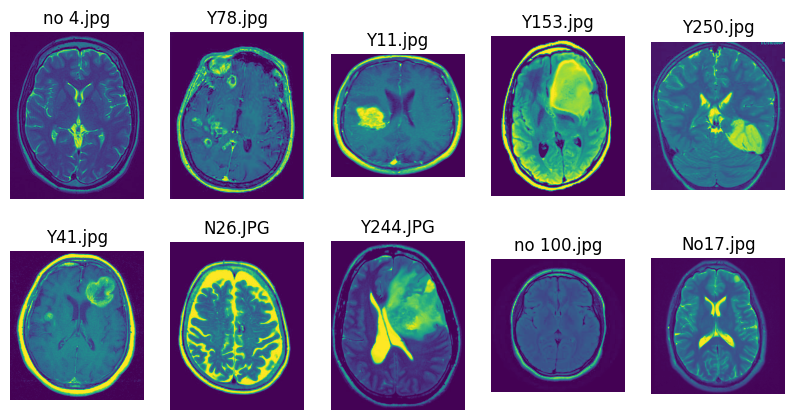

In [4]:
# Demonstration
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(PIL.Image.open(images[i]).convert('L'))
    plt.title(str(images[i]).split("/")[-1])
    plt.axis('off')


In [5]:
dimensions = []
for image in images:
  with PIL.Image.open(image) as img:
    dimensions.append(list(img.size))

dimensions = np.array(dimensions)
dimensions.shape

(253, 2)

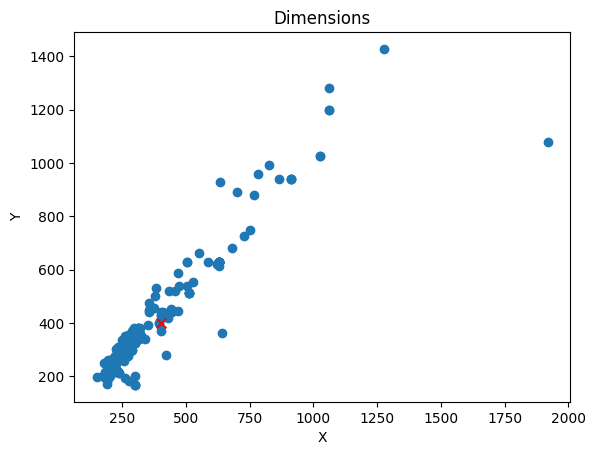

In [6]:
# Scatter dimentions
x = dimensions[:, 0]
y = dimensions[:, 1]
target_width = 400
target_height = 400
plt.scatter(x, y)
plt.scatter(target_width, target_height, color='red', marker='x', s=50, label='Specific Point')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dimensions')
plt.show()

In [7]:
def add_padding(images):
  padded_img, labels = [], []

  for image in images:
    with PIL.Image.open(image) as img:
      img_width, img_height = img.size

      width_ratio = target_width / img_width
      height_ratio = target_height / img_height

      ratio = min(width_ratio, height_ratio)

      new_width = int(img_width * ratio)
      new_height = int(img_height * ratio)

      resized_img = img.resize((new_width, new_height), PIL.Image.NEAREST)
      letterbox_img = PIL.Image.new('L', (target_width, target_height))

      left_offset = (target_width - new_width) // 2
      top_offset = (target_height - new_height) // 2

      letterbox_img.paste(resized_img, (left_offset, top_offset))
      padded_img.append((np.array(letterbox_img.convert('L'))))

      if len(re.findall(".*y.*|.*Y.*", str(image).split("/")[-1])) != 0:
        labels.append(1) #YES
      else:
        labels.append(0) #NO
  padded_img = np.reshape(padded_img, (-1, 400, 400))
  labels = np.array(labels)
  return padded_img, labels

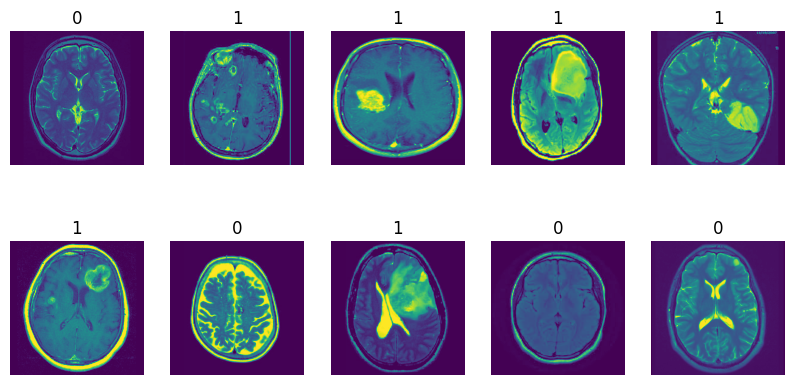

In [8]:
padded_img, labels = add_padding(images)
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(padded_img[i])
    plt.title(labels[i])
    plt.axis('off')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(padded_img, labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [10]:
print('X_train: \n',X_train)

X_train: 
 [[[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[11 11 11 ... 12 13 13]
  [12 12 12 ... 12 13 13]
  [12 12 12 ... 12 13 13]
  ...
  [12 12 12 ... 12 12 12]
  [12 12 12 ... 12 12 12]
  [12 12 12 ... 12 12 12]]

 ...

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]]

In [11]:
print('y_train: \n',y_train)

y_train: 
 [1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1
 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1
 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1
 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1]


In [12]:
def res_block(x, filters):
  fx = layers.Conv2D(filters, (3,3), padding='same', strides=(1,1), activation='relu')(x)
  fx = layers.BatchNormalization()(fx)
  fx = layers.Conv2D(filters, (3,3), padding='same', strides=(1,1))(fx)
  fx = layers.BatchNormalization()(fx)
  out = layers.Add()([x, fx])
  out = layers.Activation('relu')(out)
  #out = layers.BatchNormalization()(out)
  return out

2024-04-18 13:13:32.572495: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-04-18 13:13:32.572517: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-18 13:13:32.572524: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-18 13:13:32.572589: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-18 13:13:32.572624: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "Model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d (Depthwis  (None, 398, 398, 1)          10        ['input_1[0][0]']             
 eConv2D)                                                                                         
                                                                                                  
 conv2d (Conv2D)             (None, 398, 398, 8)          80        ['depthwise_conv2d[0][0]']    
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 199, 199, 8)          0         ['conv2d[0][0]']        

2024-04-18 13:13:33.106175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 2s 30ms/step - loss: 62.5920 - accuracy: 0.6328 - val_loss: 5.1723 - val_accuracy: 0.6842


2024-04-18 13:13:34.398624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 2/30
36/36 [==============================] - 1s 21ms/step - loss: 2.3740 - accuracy: 0.7797 - val_loss: 3.6646 - val_accuracy: 0.7105
Epoch 3/30
36/36 [==============================] - 1s 20ms/step - loss: 0.5504 - accuracy: 0.8870 - val_loss: 3.2488 - val_accuracy: 0.7895
Epoch 4/30
36/36 [==============================] - 1s 19ms/step - loss: 0.3294 - accuracy: 0.9322 - val_loss: 3.2428 - val_accuracy: 0.7105
Epoch 5/30
36/36 [==============================] - 1s 19ms/step - loss: 0.1494 - accuracy: 0.9548 - val_loss: 2.9676 - val_accuracy: 0.7105
Epoch 6/30
36/36 [==============================] - 1s 21ms/step - loss: 0.0471 - accuracy: 0.9774 - val_loss: 3.6720 - val_accuracy: 0.8421
Epoch 7/30
36/36 [==============================] - 1s 20ms/step - loss: 0.1010 - accuracy: 0.9548 - val_loss: 2.5937 - val_accuracy: 0.7368
Epoch 8/30
36/36 [==============================] - 1s 19ms/step - loss: 0.0268 - accuracy: 0.9887 - val_loss: 2.6783 - val_accuracy: 0.7368
Epoch 9/30
36

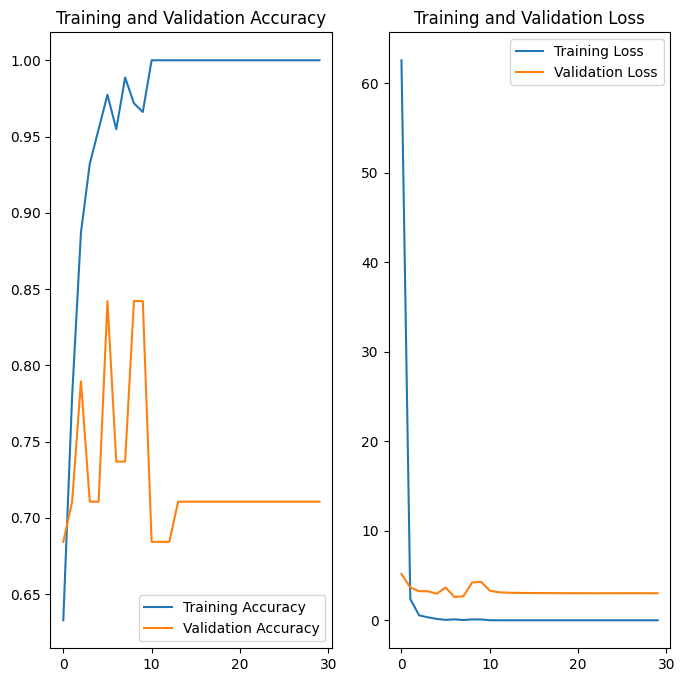

2/2 [==============================] - 0s 41ms/step
Overall Accuracy: 0.7105263157894737
Precision: 0.8260869565217391
Recall: 0.7307692307692307
F1-Score: 0.7755102040816326


2024-04-18 13:13:55.145631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


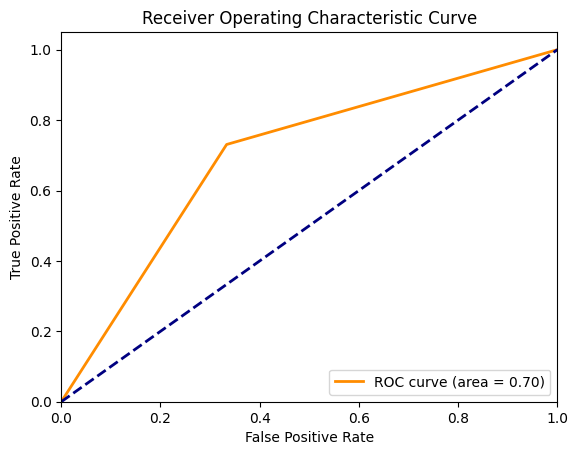

Epoch 1/30


2024-04-18 13:13:55.633745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 1s 28ms/step - loss: 135.3914 - accuracy: 0.6102 - val_loss: 5.5689 - val_accuracy: 0.8421
Epoch 2/30


2024-04-18 13:13:56.695375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 1s 19ms/step - loss: 2.5439 - accuracy: 0.7288 - val_loss: 2.1958 - val_accuracy: 0.7895
Epoch 3/30
36/36 [==============================] - 1s 19ms/step - loss: 1.2293 - accuracy: 0.7910 - val_loss: 5.2478 - val_accuracy: 0.6053
Epoch 4/30
36/36 [==============================] - 1s 19ms/step - loss: 4.3586 - accuracy: 0.7910 - val_loss: 2.8786 - val_accuracy: 0.7632
Epoch 5/30
36/36 [==============================] - 1s 19ms/step - loss: 1.1920 - accuracy: 0.7910 - val_loss: 3.0234 - val_accuracy: 0.7895
Epoch 6/30
36/36 [==============================] - 1s 19ms/step - loss: 1.0196 - accuracy: 0.8701 - val_loss: 4.1539 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 1s 19ms/step - loss: 0.8274 - accuracy: 0.9266 - val_loss: 20.0189 - val_accuracy: 0.7368
Epoch 8/30
36/36 [==============================] - 1s 19ms/step - loss: 13.4203 - accuracy: 0.7966 - val_loss: 13.4006 - val_accuracy: 0.6316
Epoch 9/30
36/36 [===

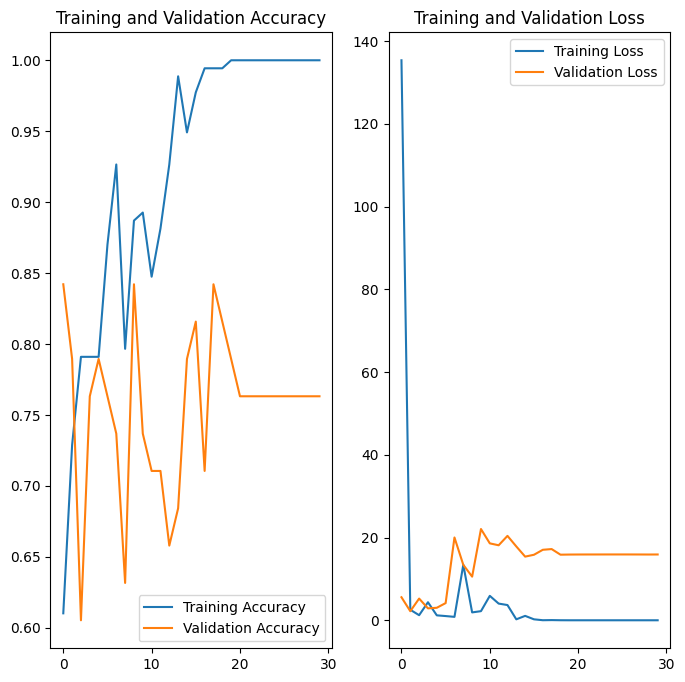

2/2 [==============================] - 0s 28ms/step
Overall Accuracy: 0.7631578947368421
Precision: 0.9047619047619048
Recall: 0.7307692307692307
F1-Score: 0.8085106382978723


2024-04-18 13:14:17.019997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


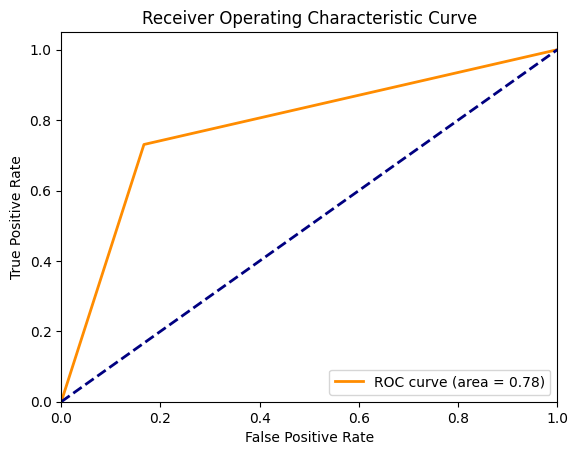

Epoch 1/30


2024-04-18 13:14:17.453468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 43.9454 - accuracy: 0.6441

2024-04-18 13:14:18.610735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 2s 31ms/step - loss: 43.9454 - accuracy: 0.6441 - val_loss: 6.0362 - val_accuracy: 0.7632
Epoch 2/30
36/36 [==============================] - 1s 26ms/step - loss: 6.5159 - accuracy: 0.7345 - val_loss: 11.4257 - val_accuracy: 0.6316
Epoch 3/30
36/36 [==============================] - 1s 19ms/step - loss: 5.6267 - accuracy: 0.6610 - val_loss: 4.8079 - val_accuracy: 0.6316
Epoch 4/30
36/36 [==============================] - 1s 19ms/step - loss: 2.9349 - accuracy: 0.7571 - val_loss: 1.5177 - val_accuracy: 0.8421
Epoch 5/30
36/36 [==============================] - 1s 19ms/step - loss: 3.9711 - accuracy: 0.6497 - val_loss: 1.8626 - val_accuracy: 0.7368
Epoch 6/30
36/36 [==============================] - 1s 19ms/step - loss: 0.8665 - accuracy: 0.7853 - val_loss: 1.1660 - val_accuracy: 0.7895
Epoch 7/30
36/36 [==============================] - 1s 19ms/step - loss: 0.7583 - accuracy: 0.8079 - val_loss: 1.1721 - val_accuracy: 0.8158
Epoch 8/30
36/36 [====

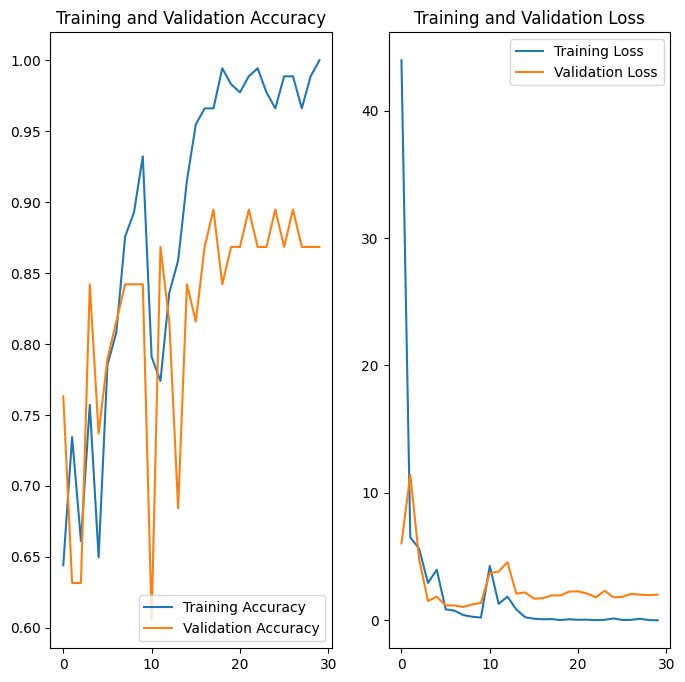

2/2 [==============================] - 0s 28ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.9545454545454546
Recall: 0.8076923076923077
F1-Score: 0.875


2024-04-18 13:14:38.784057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


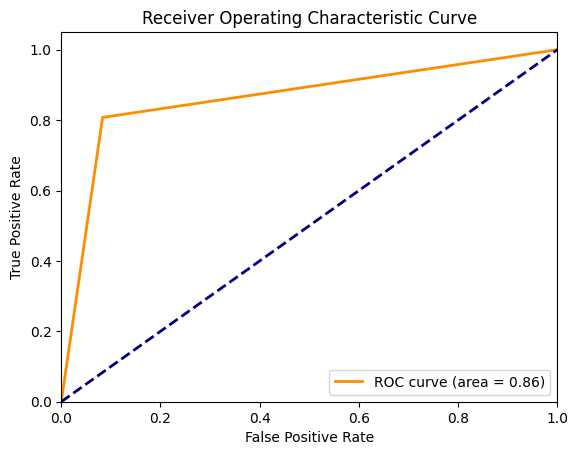

In [12]:
for i in range(3):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(16, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(32, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block(y, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(100, activation='relu')(y) 
    y = layers.Dense(1, activation='sigmoid')(y)

    model_1 = tf.keras.Model(x,y)
    model_1._name = 'Model_1'
    
    if i == 0:
        model_1.summary()

    # COMPILING
    model_1.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # TRAINING
    epochs = 30
    history = model_1.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_1.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_1
    del history


Model: "Model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_160 (InputLayer)      [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_159 (Dept  (None, 398, 398, 1)          10        ['input_160[0][0]']           
 hwiseConv2D)                                                                                     
                                                                                                  
 conv2d_1192 (Conv2D)        (None, 398, 398, 8)          80        ['depthwise_conv2d_159[0][0]']
                                                                                                  
 max_pooling2d_674 (MaxPool  (None, 199, 199, 8)          0         ['conv2d_1192[0][0]']   

2024-04-16 22:29:45.922863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 60.9296 - accuracy: 0.5876

2024-04-16 22:29:56.868281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 15s 266ms/step - loss: 60.9296 - accuracy: 0.5876 - val_loss: 10.6930 - val_accuracy: 0.5263
Epoch 2/30
36/36 [==============================] - 3s 72ms/step - loss: 1.5140 - accuracy: 0.7401 - val_loss: 2.5931 - val_accuracy: 0.5526
Epoch 3/30
36/36 [==============================] - 1s 25ms/step - loss: 0.7227 - accuracy: 0.7910 - val_loss: 1.5971 - val_accuracy: 0.7105
Epoch 4/30
36/36 [==============================] - 2s 43ms/step - loss: 0.5958 - accuracy: 0.8305 - val_loss: 1.7042 - val_accuracy: 0.6579
Epoch 5/30
36/36 [==============================] - 2s 43ms/step - loss: 0.4650 - accuracy: 0.8644 - val_loss: 1.6836 - val_accuracy: 0.7895
Epoch 6/30
36/36 [==============================] - 1s 19ms/step - loss: 0.2852 - accuracy: 0.9096 - val_loss: 1.5690 - val_accuracy: 0.7105
Epoch 7/30
36/36 [==============================] - 1s 33ms/step - loss: 0.2050 - accuracy: 0.9661 - val_loss: 1.5413 - val_accuracy: 0.7368
Epoch 8/30
36/36 [==

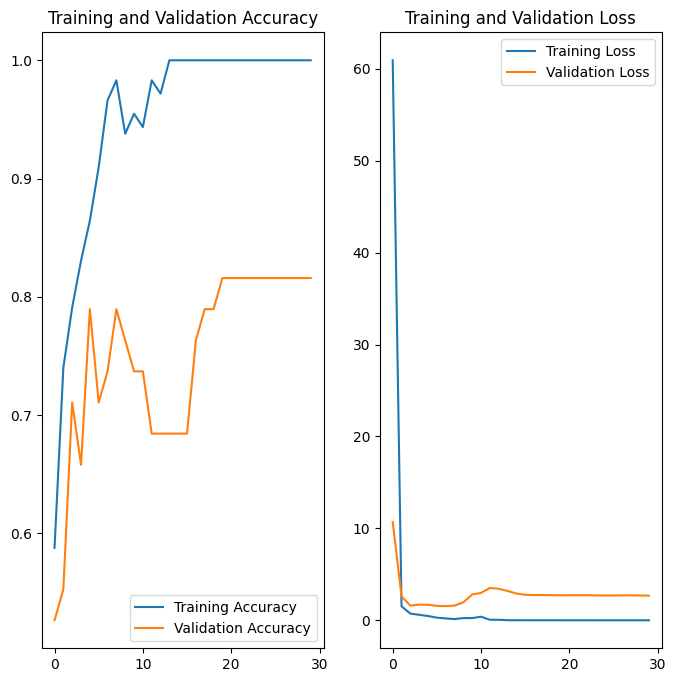

2024-04-16 22:30:28.022116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 458ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8260869565217391
Recall: 0.8636363636363636
F1-Score: 0.8444444444444444


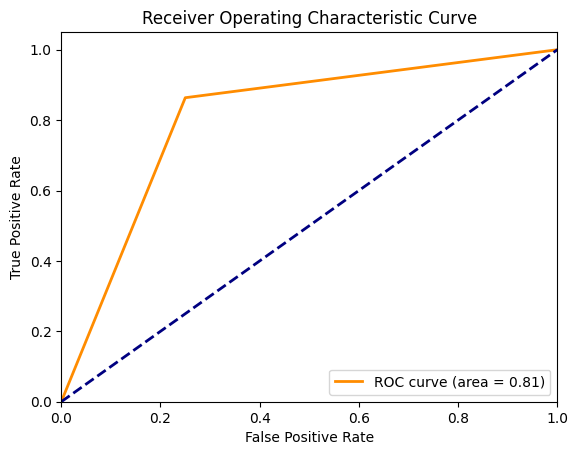

Epoch 1/30


2024-04-16 22:30:29.840267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 9.2590 - accuracy: 0.6780

2024-04-16 22:30:40.829959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 13s 242ms/step - loss: 9.2590 - accuracy: 0.6780 - val_loss: 2.0910 - val_accuracy: 0.6053
Epoch 2/30
36/36 [==============================] - 2s 59ms/step - loss: 1.5357 - accuracy: 0.5028 - val_loss: 1.5070 - val_accuracy: 0.4474
Epoch 3/30
36/36 [==============================] - 1s 38ms/step - loss: 2.1187 - accuracy: 0.5367 - val_loss: 1.5645 - val_accuracy: 0.4211
Epoch 4/30
36/36 [==============================] - 1s 26ms/step - loss: 1.9456 - accuracy: 0.5085 - val_loss: 23.7873 - val_accuracy: 0.4737
Epoch 5/30
36/36 [==============================] - 1s 20ms/step - loss: 26.4783 - accuracy: 0.6610 - val_loss: 26.8678 - val_accuracy: 0.7105
Epoch 6/30
36/36 [==============================] - 1s 19ms/step - loss: 11.4465 - accuracy: 0.6667 - val_loss: 54.2188 - val_accuracy: 0.5000
Epoch 7/30
36/36 [==============================] - 1s 27ms/step - loss: 21.0697 - accuracy: 0.6497 - val_loss: 20.1107 - val_accuracy: 0.6316
Epoch 8/30
36/3

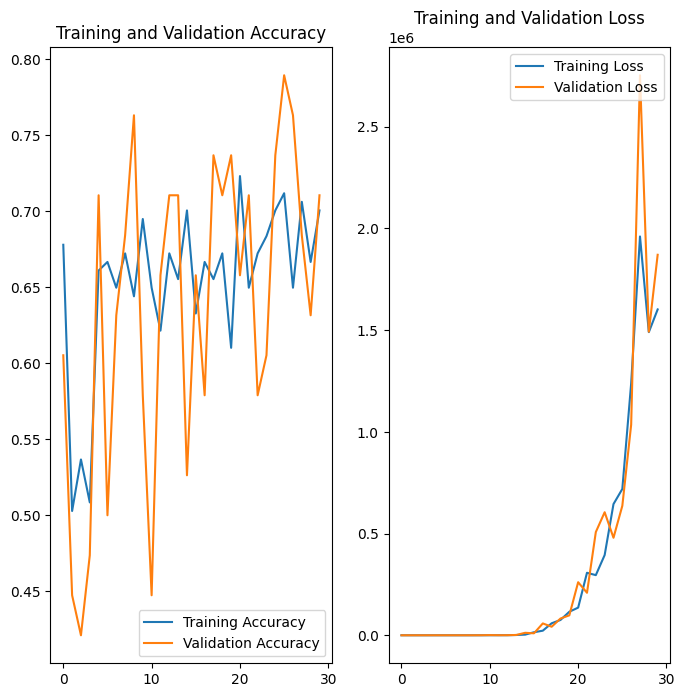

2024-04-16 22:31:12.486353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 436ms/step
Overall Accuracy: 0.6578947368421053
Precision: 0.7368421052631579
Recall: 0.6363636363636364
F1-Score: 0.6829268292682926


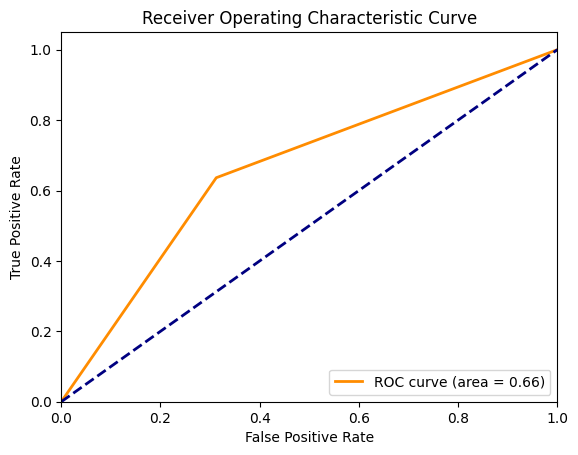

Epoch 1/30


2024-04-16 22:31:14.270211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 31.7289 - accuracy: 0.6949

2024-04-16 22:31:24.648979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 14s 286ms/step - loss: 31.7289 - accuracy: 0.6949 - val_loss: 12.7780 - val_accuracy: 0.6842
Epoch 2/30
36/36 [==============================] - 3s 77ms/step - loss: 3.0781 - accuracy: 0.6780 - val_loss: 6.4338 - val_accuracy: 0.5263
Epoch 3/30
36/36 [==============================] - 2s 47ms/step - loss: 4.8356 - accuracy: 0.6949 - val_loss: 6.8798 - val_accuracy: 0.7368
Epoch 4/30
36/36 [==============================] - 2s 50ms/step - loss: 2.0121 - accuracy: 0.7966 - val_loss: 10.4004 - val_accuracy: 0.6316
Epoch 5/30
36/36 [==============================] - 1s 22ms/step - loss: 0.4567 - accuracy: 0.8588 - val_loss: 5.3831 - val_accuracy: 0.7368
Epoch 6/30
36/36 [==============================] - 1s 29ms/step - loss: 0.4539 - accuracy: 0.8927 - val_loss: 6.9856 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 1s 20ms/step - loss: 0.3087 - accuracy: 0.9379 - val_loss: 8.2904 - val_accuracy: 0.7632
Epoch 8/30
36/36 [=

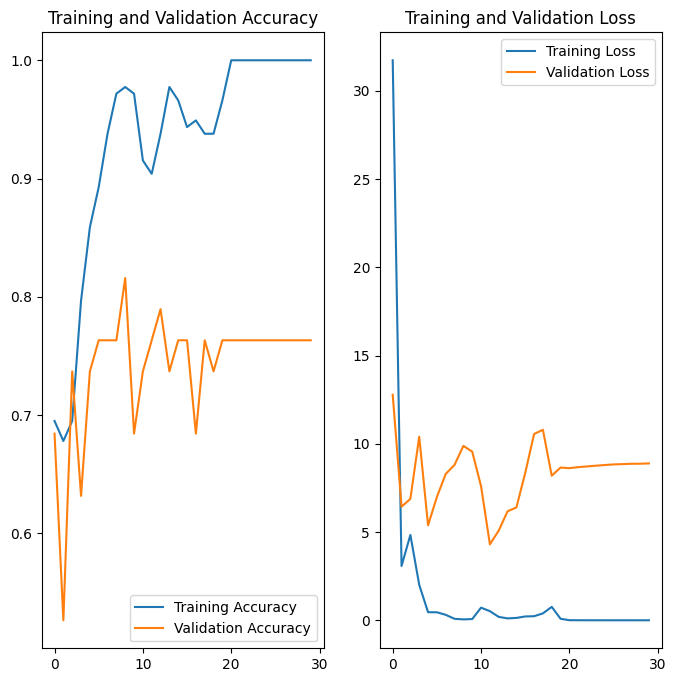

2024-04-16 22:31:58.317749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 763ms/step
Overall Accuracy: 0.7894736842105263
Precision: 0.8181818181818182
Recall: 0.8181818181818182
F1-Score: 0.8181818181818182


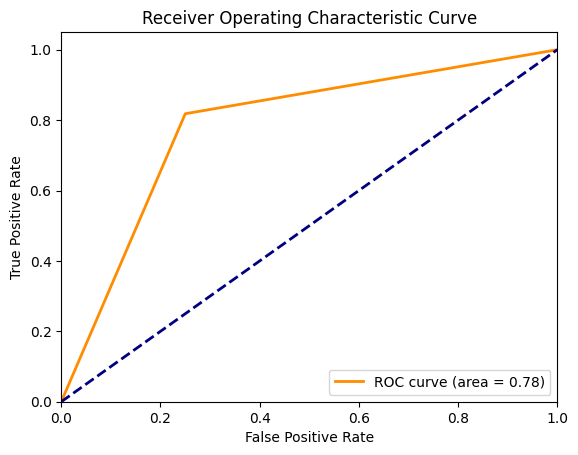

Epoch 1/30


2024-04-16 22:32:00.244857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 33.7812 - accuracy: 0.6497

2024-04-16 22:32:12.479594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 16s 310ms/step - loss: 33.7812 - accuracy: 0.6497 - val_loss: 2.5776 - val_accuracy: 0.8421
Epoch 2/30
36/36 [==============================] - 1s 39ms/step - loss: 1.0530 - accuracy: 0.8362 - val_loss: 1.7553 - val_accuracy: 0.7632
Epoch 3/30
36/36 [==============================] - 1s 38ms/step - loss: 0.2163 - accuracy: 0.9096 - val_loss: 1.4572 - val_accuracy: 0.7632
Epoch 4/30
36/36 [==============================] - 1s 42ms/step - loss: 0.1399 - accuracy: 0.9548 - val_loss: 1.7739 - val_accuracy: 0.7368
Epoch 5/30
36/36 [==============================] - 1s 28ms/step - loss: 0.1239 - accuracy: 0.9379 - val_loss: 1.1965 - val_accuracy: 0.7895
Epoch 6/30
36/36 [==============================] - 2s 49ms/step - loss: 0.0264 - accuracy: 0.9887 - val_loss: 1.3938 - val_accuracy: 0.8421
Epoch 7/30
36/36 [==============================] - 1s 42ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 1.5196 - val_accuracy: 0.8158
Epoch 8/30
36/36 [===

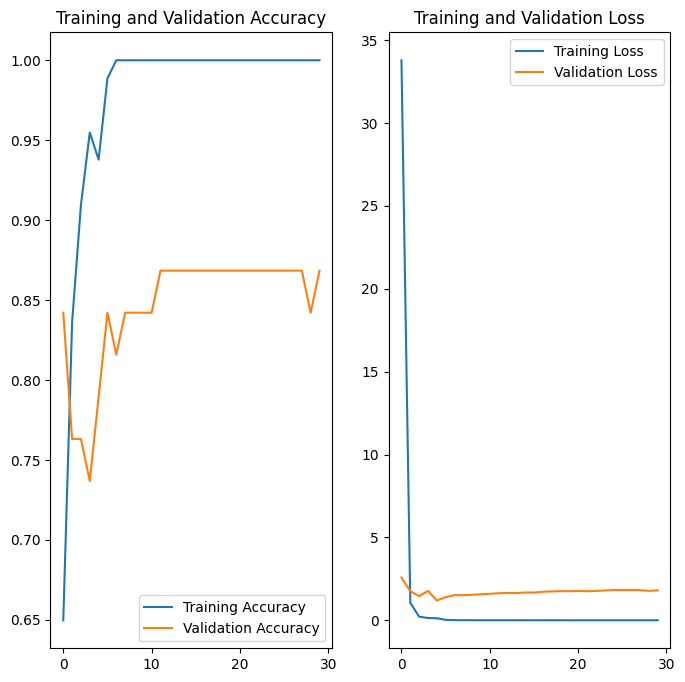

2024-04-16 22:32:43.552612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 764ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.8333333333333334
Recall: 0.9090909090909091
F1-Score: 0.8695652173913043


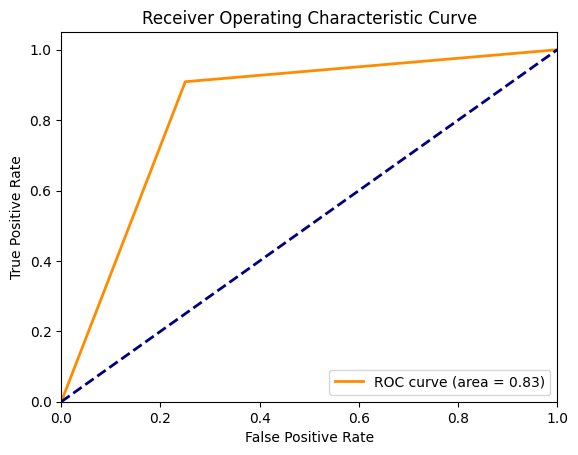

Epoch 1/30


2024-04-16 22:32:45.689982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 45.0925 - accuracy: 0.6384

2024-04-16 22:33:00.212579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 19s 402ms/step - loss: 45.0925 - accuracy: 0.6384 - val_loss: 11.7759 - val_accuracy: 0.7895
Epoch 2/30
36/36 [==============================] - 2s 68ms/step - loss: 6.4865 - accuracy: 0.7966 - val_loss: 13.9136 - val_accuracy: 0.7105
Epoch 3/30
36/36 [==============================] - 2s 50ms/step - loss: 2.6187 - accuracy: 0.8249 - val_loss: 8.0971 - val_accuracy: 0.8158
Epoch 4/30
36/36 [==============================] - 1s 42ms/step - loss: 2.1201 - accuracy: 0.8136 - val_loss: 11.7570 - val_accuracy: 0.7632
Epoch 5/30
36/36 [==============================] - 1s 40ms/step - loss: 1.0922 - accuracy: 0.8814 - val_loss: 6.6419 - val_accuracy: 0.8158
Epoch 6/30
36/36 [==============================] - 2s 43ms/step - loss: 0.2272 - accuracy: 0.9492 - val_loss: 5.1708 - val_accuracy: 0.7368
Epoch 7/30
36/36 [==============================] - 1s 19ms/step - loss: 0.1224 - accuracy: 0.9605 - val_loss: 5.1318 - val_accuracy: 0.7895
Epoch 8/30
36/36 [

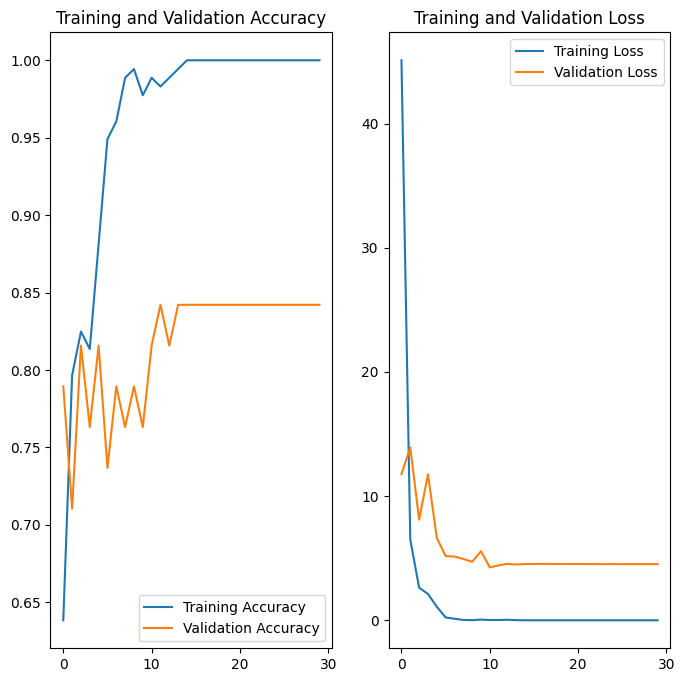

2024-04-16 22:33:35.532690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 474ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8571428571428571
Recall: 0.8181818181818182
F1-Score: 0.8372093023255814


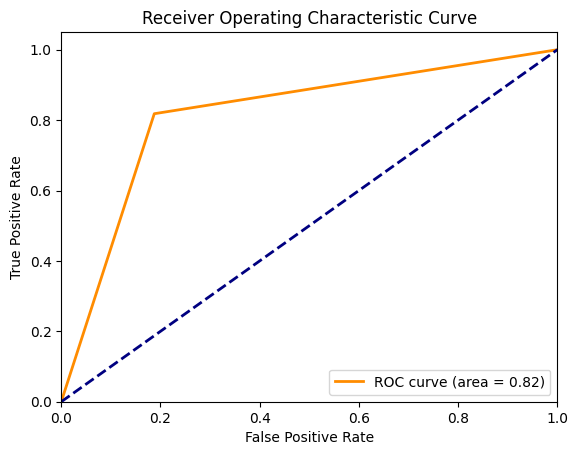

In [108]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(16, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(32, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block(y, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_2 = tf.keras.Model(x,y)
    model_2._name = 'Model_2'
    
    if i == 0:
        model_2.summary()

    # COMPILING
    model_2.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # TRAINING
    epochs = 30
    history = model_2.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_2.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_2
    del history

In [109]:
def res_block_adj(x, ch_in, ch_out):
  fx = layers.Conv2D(ch_in/2, (1,1), padding='same', strides=(1,1), activation='relu')(x)
  fx = layers.Conv2D(ch_in/2, (3,3), padding='same', strides=(1,1), activation='relu')(fx)
  fx = layers.Conv2D(ch_out, (1,1), padding='same', strides=(1,1))(fx)

  skip_connection = layers.Conv2D(ch_out, (1,1), padding='same', strides=(1,1))(x)

  out = layers.Add()([skip_connection, fx])
  out = layers.Activation('relu')(out)
  return out

Model: "Model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_165 (InputLayer)      [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_164 (Dept  (None, 398, 398, 1)          10        ['input_165[0][0]']           
 hwiseConv2D)                                                                                     
                                                                                                  
 conv2d_1217 (Conv2D)        (None, 398, 398, 8)          208       ['depthwise_conv2d_164[0][0]']
                                                                                                  
 max_pooling2d_694 (MaxPool  (None, 199, 199, 8)          0         ['conv2d_1217[0][0]']   

2024-04-16 22:33:37.388567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 59.2697 - accuracy: 0.6610

2024-04-16 22:33:56.874301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 25s 472ms/step - loss: 59.2697 - accuracy: 0.6610 - val_loss: 6.2284 - val_accuracy: 0.8684
Epoch 2/30
36/36 [==============================] - 3s 84ms/step - loss: 4.2832 - accuracy: 0.7232 - val_loss: 1.3620 - val_accuracy: 0.9474
Epoch 3/30
36/36 [==============================] - 2s 68ms/step - loss: 0.7919 - accuracy: 0.8644 - val_loss: 1.9771 - val_accuracy: 0.8684
Epoch 4/30
36/36 [==============================] - 2s 57ms/step - loss: 0.2532 - accuracy: 0.9266 - val_loss: 1.9331 - val_accuracy: 0.8684
Epoch 5/30
36/36 [==============================] - 1s 35ms/step - loss: 0.1345 - accuracy: 0.9605 - val_loss: 1.3885 - val_accuracy: 0.8947
Epoch 6/30
36/36 [==============================] - 2s 53ms/step - loss: 0.0576 - accuracy: 0.9831 - val_loss: 1.5463 - val_accuracy: 0.8947
Epoch 7/30
36/36 [==============================] - 1s 25ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 1.5848 - val_accuracy: 0.8947
Epoch 8/30
36/36 [===

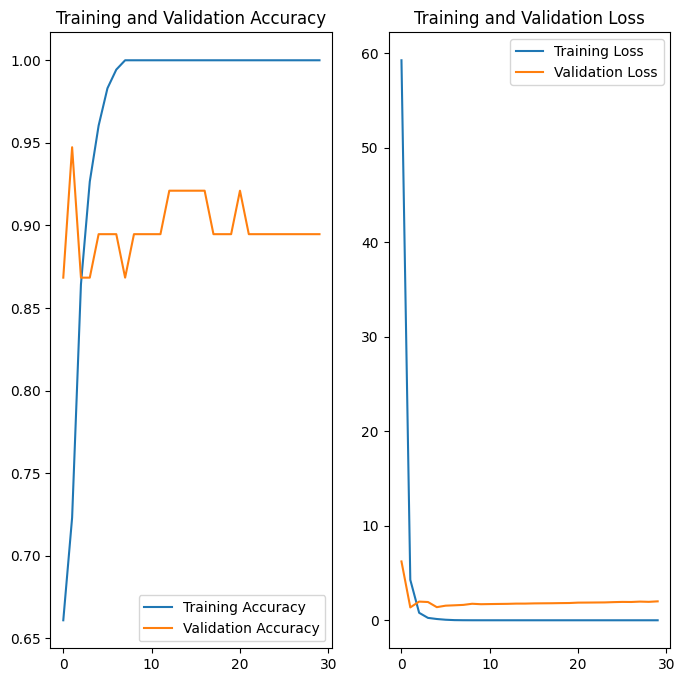

2024-04-16 22:34:37.243314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 1s/step
Overall Accuracy: 0.9210526315789473
Precision: 0.88
Recall: 1.0
F1-Score: 0.9361702127659575


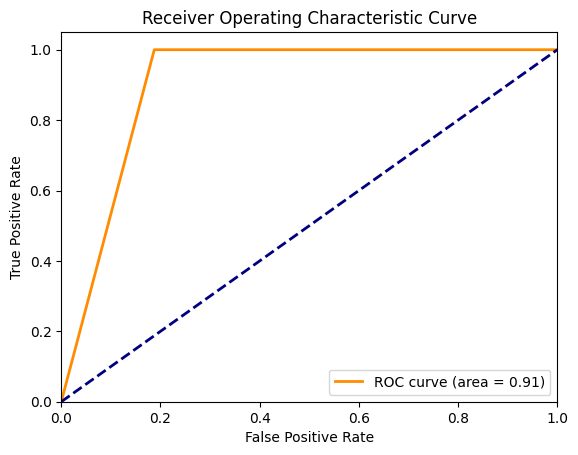

Epoch 1/30


2024-04-16 22:34:40.563819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 611.7935 - accuracy: 0.5424

2024-04-16 22:34:59.752235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 24s 459ms/step - loss: 611.7935 - accuracy: 0.5424 - val_loss: 105.6447 - val_accuracy: 0.7105
Epoch 2/30
36/36 [==============================] - 3s 80ms/step - loss: 87.0867 - accuracy: 0.6723 - val_loss: 48.3837 - val_accuracy: 0.5789
Epoch 3/30
36/36 [==============================] - 2s 46ms/step - loss: 38.0617 - accuracy: 0.6836 - val_loss: 40.3844 - val_accuracy: 0.5526
Epoch 4/30
36/36 [==============================] - 2s 56ms/step - loss: 75.9556 - accuracy: 0.6723 - val_loss: 44.2794 - val_accuracy: 0.5526
Epoch 5/30
36/36 [==============================] - 2s 62ms/step - loss: 53.6186 - accuracy: 0.7288 - val_loss: 45.5472 - val_accuracy: 0.8158
Epoch 6/30
36/36 [==============================] - 4s 102ms/step - loss: 19.7836 - accuracy: 0.8136 - val_loss: 51.1020 - val_accuracy: 0.7105
Epoch 7/30
36/36 [==============================] - 2s 51ms/step - loss: 15.1316 - accuracy: 0.8362 - val_loss: 43.4522 - val_accuracy: 0.5789
Epoch

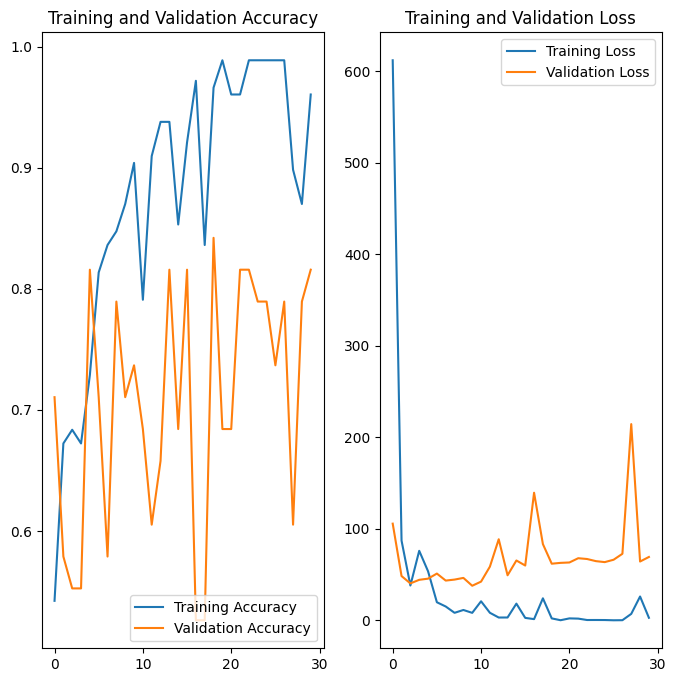

2024-04-16 22:35:41.954153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 1s/step
Overall Accuracy: 0.868421052631579
Precision: 0.8148148148148148
Recall: 1.0
F1-Score: 0.8979591836734693


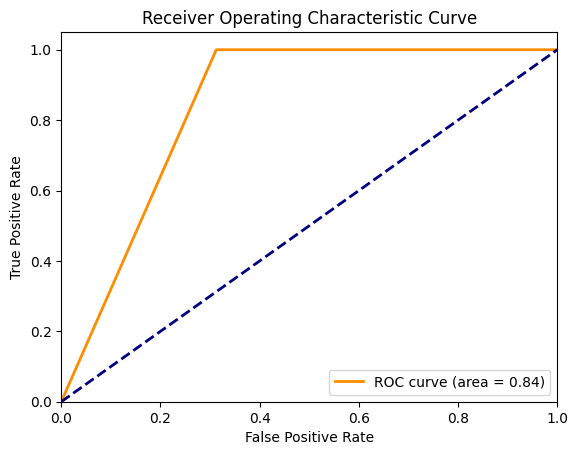

Epoch 1/30


2024-04-16 22:35:45.118339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 17.9345 - accuracy: 0.5763

2024-04-16 22:36:04.509739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 24s 479ms/step - loss: 17.9345 - accuracy: 0.5763 - val_loss: 10.4501 - val_accuracy: 0.7632
Epoch 2/30
36/36 [==============================] - 3s 90ms/step - loss: 6.9643 - accuracy: 0.7119 - val_loss: 8.1112 - val_accuracy: 0.7895
Epoch 3/30
36/36 [==============================] - 3s 78ms/step - loss: 5.7971 - accuracy: 0.7853 - val_loss: 4.3942 - val_accuracy: 0.8421
Epoch 4/30
36/36 [==============================] - 2s 63ms/step - loss: 1.1171 - accuracy: 0.8870 - val_loss: 3.4143 - val_accuracy: 0.9211
Epoch 5/30
36/36 [==============================] - 1s 29ms/step - loss: 0.6020 - accuracy: 0.9379 - val_loss: 3.2605 - val_accuracy: 0.8947
Epoch 6/30
36/36 [==============================] - 1s 37ms/step - loss: 0.1537 - accuracy: 0.9605 - val_loss: 3.7355 - val_accuracy: 0.8947
Epoch 7/30
36/36 [==============================] - 1s 31ms/step - loss: 0.0807 - accuracy: 0.9831 - val_loss: 4.7978 - val_accuracy: 0.8684
Epoch 8/30
36/36 [==

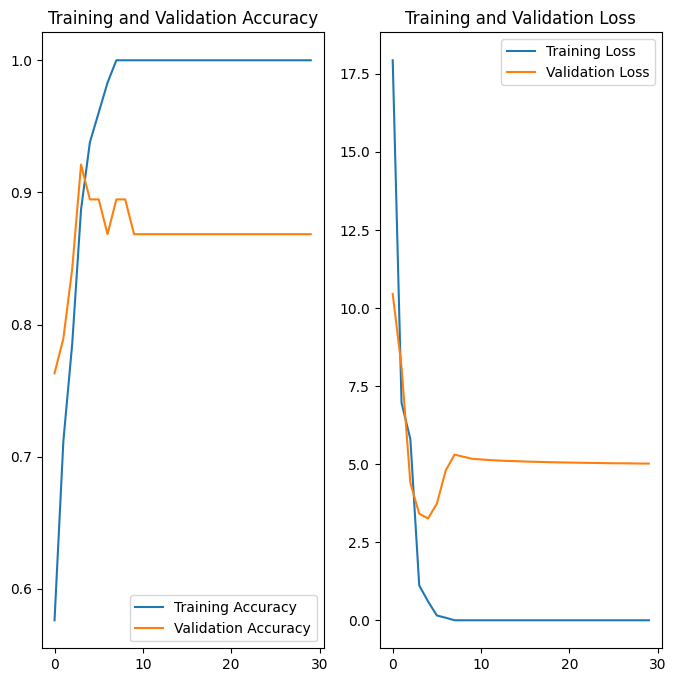

2024-04-16 22:36:51.243153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 1s/step
Overall Accuracy: 0.8421052631578947
Precision: 0.8636363636363636
Recall: 0.8636363636363636
F1-Score: 0.8636363636363636


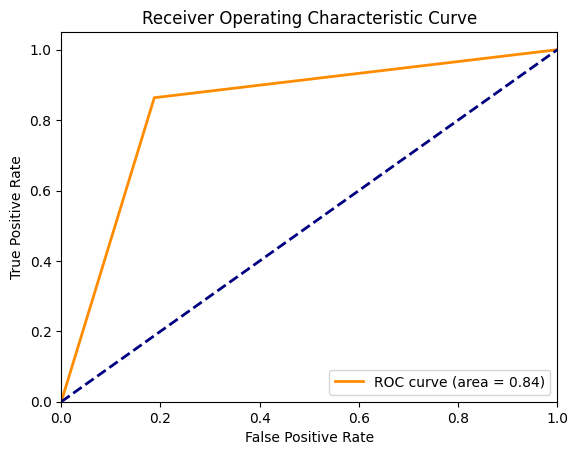

Epoch 1/30


2024-04-16 22:36:54.632234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 81.5521 - accuracy: 0.6215

2024-04-16 22:37:16.081528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 27s 527ms/step - loss: 81.5521 - accuracy: 0.6215 - val_loss: 7.5947 - val_accuracy: 0.5789
Epoch 2/30
36/36 [==============================] - 4s 118ms/step - loss: 4.6864 - accuracy: 0.7627 - val_loss: 2.4700 - val_accuracy: 0.7368
Epoch 3/30
36/36 [==============================] - 2s 50ms/step - loss: 0.5460 - accuracy: 0.8927 - val_loss: 2.0723 - val_accuracy: 0.8421
Epoch 4/30
36/36 [==============================] - 2s 54ms/step - loss: 0.2859 - accuracy: 0.9209 - val_loss: 3.5082 - val_accuracy: 0.8421
Epoch 5/30
36/36 [==============================] - 2s 42ms/step - loss: 0.0744 - accuracy: 0.9605 - val_loss: 3.8869 - val_accuracy: 0.8158
Epoch 6/30
36/36 [==============================] - 1s 26ms/step - loss: 0.0453 - accuracy: 0.9831 - val_loss: 3.1171 - val_accuracy: 0.8421
Epoch 7/30
36/36 [==============================] - 1s 36ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 3.0522 - val_accuracy: 0.8421
Epoch 8/30
36/36 [==

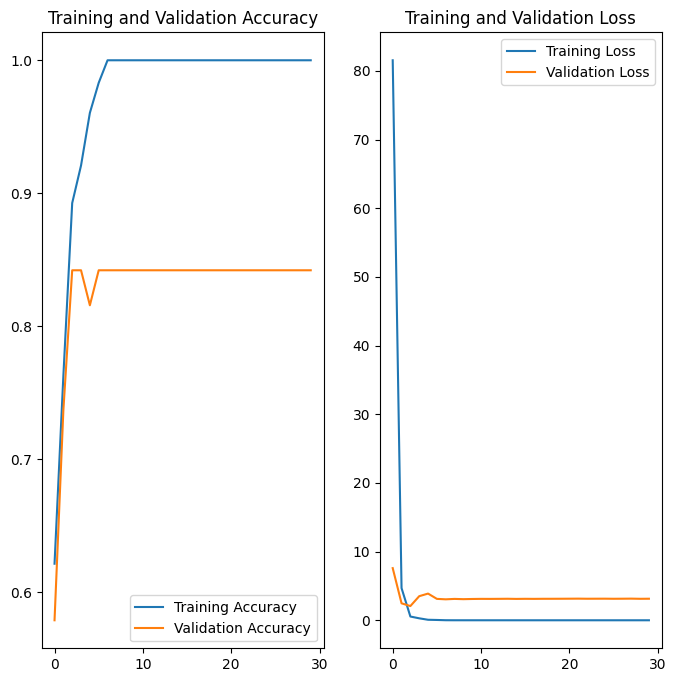

2024-04-16 22:37:57.290682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 1s/step
Overall Accuracy: 0.868421052631579
Precision: 0.84
Recall: 0.9545454545454546
F1-Score: 0.8936170212765958


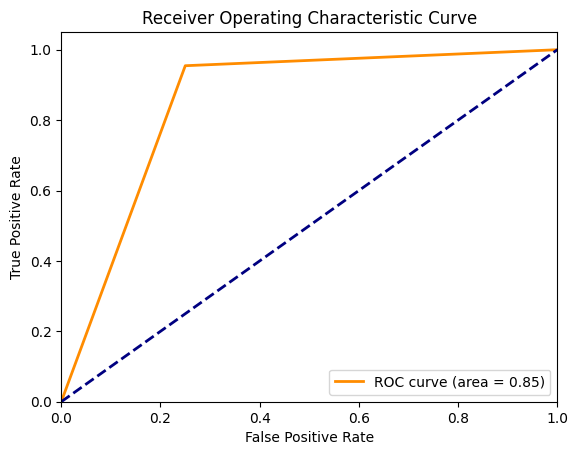

Epoch 1/30


2024-04-16 22:37:59.981159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 30.4781 - accuracy: 0.6328

2024-04-16 22:38:18.338089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 23s 446ms/step - loss: 30.4781 - accuracy: 0.6328 - val_loss: 26.7988 - val_accuracy: 0.7368
Epoch 2/30
36/36 [==============================] - 4s 99ms/step - loss: 13.5440 - accuracy: 0.7232 - val_loss: 14.7613 - val_accuracy: 0.8421
Epoch 3/30
36/36 [==============================] - 2s 68ms/step - loss: 12.0052 - accuracy: 0.7345 - val_loss: 15.5575 - val_accuracy: 0.8421
Epoch 4/30
36/36 [==============================] - 2s 66ms/step - loss: 11.7496 - accuracy: 0.7345 - val_loss: 14.3127 - val_accuracy: 0.8421
Epoch 5/30
36/36 [==============================] - 1s 42ms/step - loss: 11.4485 - accuracy: 0.7232 - val_loss: 14.5252 - val_accuracy: 0.8421
Epoch 6/30
36/36 [==============================] - 1s 25ms/step - loss: 11.0441 - accuracy: 0.7288 - val_loss: 14.0806 - val_accuracy: 0.8421
Epoch 7/30
36/36 [==============================] - 1s 41ms/step - loss: 10.6484 - accuracy: 0.7401 - val_loss: 13.7539 - val_accuracy: 0.8421
Epoch 8/

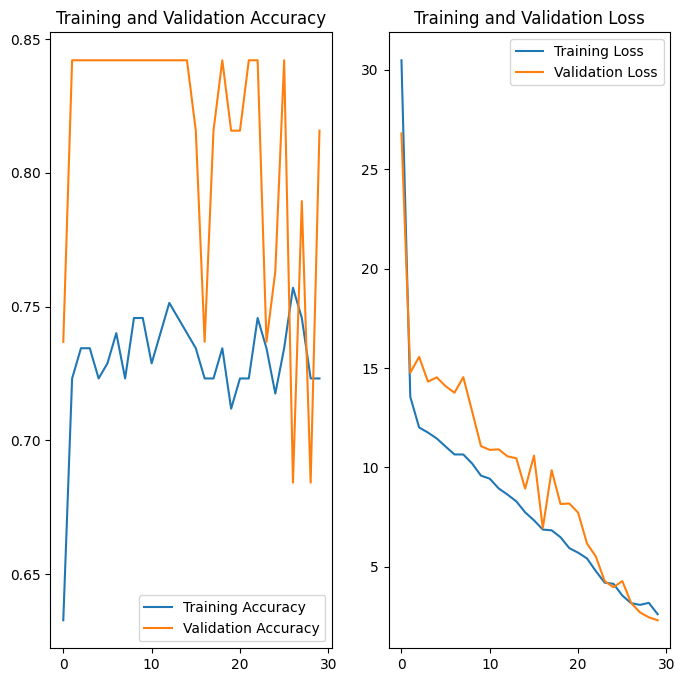

2024-04-16 22:39:02.382358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 1s/step
Overall Accuracy: 0.631578947368421
Precision: 0.7
Recall: 0.6363636363636364
F1-Score: 0.6666666666666666


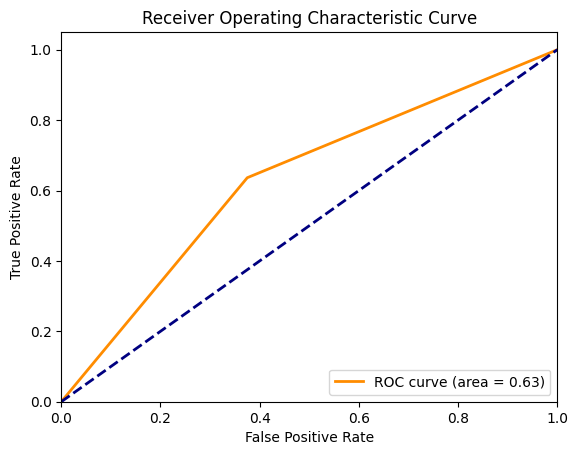

In [110]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='valid', depth_multiplier=1)(x)
    
    y = layers.Conv2D(8, (5,5), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 8, 16)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 16, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 32, 64)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)    

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_3 = tf.keras.Model(x,y)
    model_3._name = 'Model_3'
    
    if i == 0:
        model_3.summary()

    # COMPILING
    model_3.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # TRAINING
    epochs = 30
    history = model_3.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_3.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_3
    del history

Model: "Model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_170 (InputLayer)      [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_169 (Dept  (None, 398, 398, 1)          10        ['input_170[0][0]']           
 hwiseConv2D)                                                                                     
                                                                                                  
 conv2d_1282 (Conv2D)        (None, 398, 398, 8)          208       ['depthwise_conv2d_169[0][0]']
                                                                                                  
 max_pooling2d_714 (MaxPool  (None, 199, 199, 8)          0         ['conv2d_1282[0][0]']   

2024-04-16 22:39:05.894851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 47.5479 - accuracy: 0.5198

2024-04-16 22:39:33.832121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 36s 689ms/step - loss: 47.5479 - accuracy: 0.5198 - val_loss: 2.6259 - val_accuracy: 0.4474
Epoch 2/30
36/36 [==============================] - 2s 62ms/step - loss: 2.0933 - accuracy: 0.6554 - val_loss: 1.9758 - val_accuracy: 0.6579
Epoch 3/30
36/36 [==============================] - 4s 103ms/step - loss: 1.6473 - accuracy: 0.6328 - val_loss: 0.8651 - val_accuracy: 0.6579
Epoch 4/30
36/36 [==============================] - 3s 71ms/step - loss: 1.6534 - accuracy: 0.6554 - val_loss: 0.8993 - val_accuracy: 0.6053
Epoch 5/30
36/36 [==============================] - 3s 78ms/step - loss: 0.7711 - accuracy: 0.7740 - val_loss: 1.4964 - val_accuracy: 0.6579
Epoch 6/30
36/36 [==============================] - 1s 28ms/step - loss: 1.5486 - accuracy: 0.6441 - val_loss: 0.6227 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 1s 27ms/step - loss: 0.8972 - accuracy: 0.7514 - val_loss: 3.0868 - val_accuracy: 0.4474
Epoch 8/30
36/36 [==

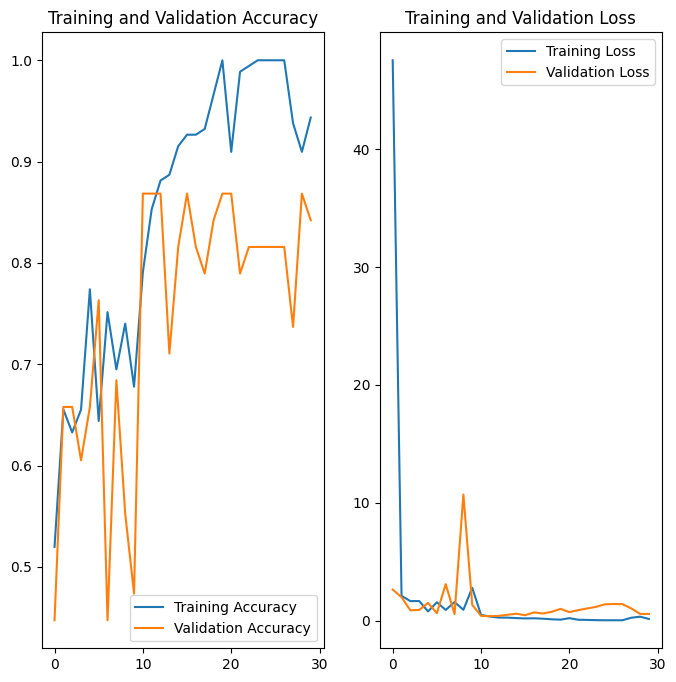

2024-04-16 22:40:30.703635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 5s 2s/step
Overall Accuracy: 0.8157894736842105
Precision: 0.7777777777777778
Recall: 0.9545454545454546
F1-Score: 0.8571428571428572


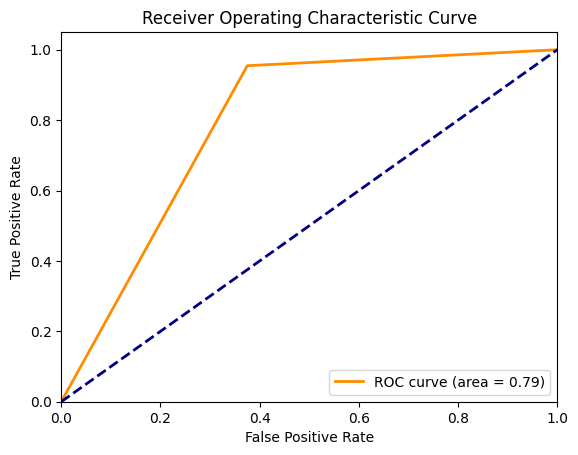

Epoch 1/30


2024-04-16 22:40:35.856684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 6.3075 - accuracy: 0.5989

2024-04-16 22:40:58.971232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 29s 484ms/step - loss: 6.3075 - accuracy: 0.5989 - val_loss: 1.6627 - val_accuracy: 0.6053
Epoch 2/30
36/36 [==============================] - 2s 51ms/step - loss: 0.6792 - accuracy: 0.6949 - val_loss: 0.6377 - val_accuracy: 0.6842
Epoch 3/30
36/36 [==============================] - 2s 64ms/step - loss: 0.5415 - accuracy: 0.7062 - val_loss: 0.6011 - val_accuracy: 0.7105
Epoch 4/30
36/36 [==============================] - 1s 28ms/step - loss: 0.4903 - accuracy: 0.7401 - val_loss: 0.6392 - val_accuracy: 0.7368
Epoch 5/30
36/36 [==============================] - 4s 107ms/step - loss: 0.4336 - accuracy: 0.7797 - val_loss: 0.4789 - val_accuracy: 0.7895
Epoch 6/30
36/36 [==============================] - 4s 113ms/step - loss: 0.3415 - accuracy: 0.8814 - val_loss: 0.5815 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 2s 57ms/step - loss: 0.2062 - accuracy: 0.9322 - val_loss: 0.5660 - val_accuracy: 0.7632
Epoch 8/30
36/36 [==

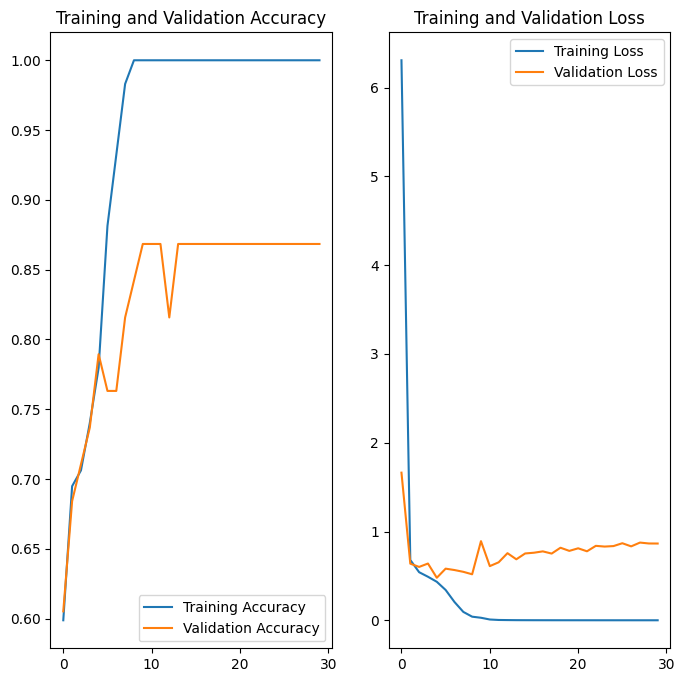

2024-04-16 22:41:48.434093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 1s/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8260869565217391
Recall: 0.8636363636363636
F1-Score: 0.8444444444444444


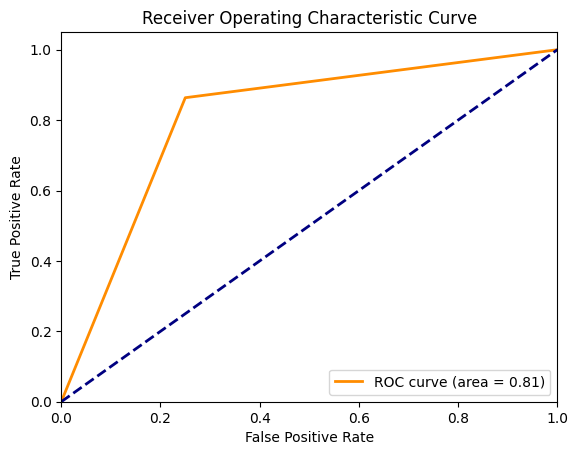

Epoch 1/30


2024-04-16 22:41:52.385436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 2.0037 - accuracy: 0.6441

2024-04-16 22:42:14.221642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 25s 418ms/step - loss: 2.0037 - accuracy: 0.6441 - val_loss: 0.6610 - val_accuracy: 0.4737
Epoch 2/30
36/36 [==============================] - 4s 111ms/step - loss: 0.5801 - accuracy: 0.6949 - val_loss: 0.5963 - val_accuracy: 0.7368
Epoch 3/30
36/36 [==============================] - 3s 86ms/step - loss: 0.5370 - accuracy: 0.7345 - val_loss: 0.6617 - val_accuracy: 0.7105
Epoch 4/30
36/36 [==============================] - 2s 63ms/step - loss: 0.5140 - accuracy: 0.7062 - val_loss: 0.5474 - val_accuracy: 0.7895
Epoch 5/30
36/36 [==============================] - 2s 46ms/step - loss: 0.4870 - accuracy: 0.7910 - val_loss: 0.5782 - val_accuracy: 0.8158
Epoch 6/30
36/36 [==============================] - 2s 56ms/step - loss: 0.4666 - accuracy: 0.7571 - val_loss: 0.4876 - val_accuracy: 0.6842
Epoch 7/30
36/36 [==============================] - 2s 68ms/step - loss: 0.4906 - accuracy: 0.7740 - val_loss: 0.5319 - val_accuracy: 0.8421
Epoch 8/30
36/36 [===

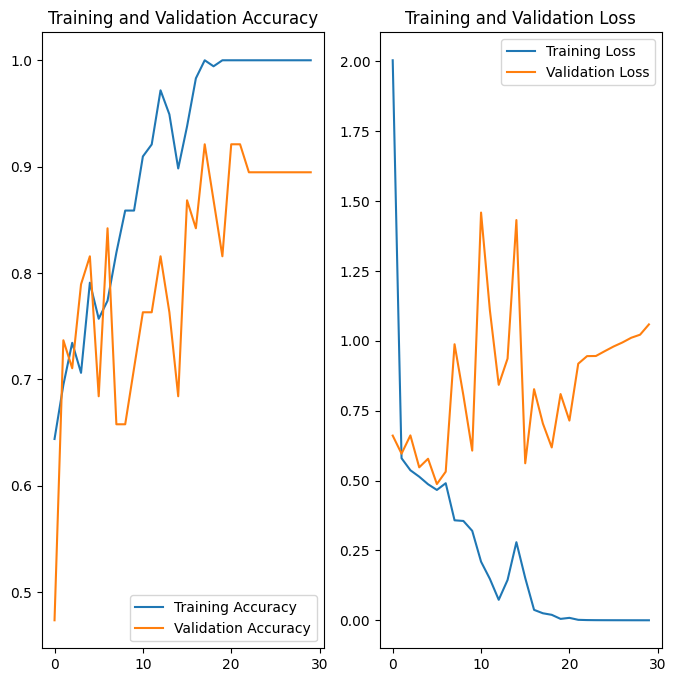

2024-04-16 22:43:08.596478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 2s/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8260869565217391
Recall: 0.8636363636363636
F1-Score: 0.8444444444444444


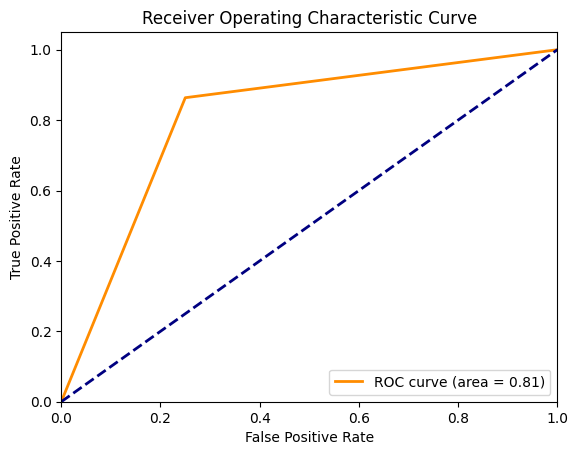

Epoch 1/30


2024-04-16 22:43:15.575056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 46.9001 - accuracy: 0.6328

2024-04-16 22:43:42.054362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 35s 607ms/step - loss: 46.9001 - accuracy: 0.6328 - val_loss: 11.8955 - val_accuracy: 0.5789
Epoch 2/30
36/36 [==============================] - 5s 132ms/step - loss: 8.0517 - accuracy: 0.6384 - val_loss: 6.5633 - val_accuracy: 0.5000
Epoch 3/30
36/36 [==============================] - 2s 61ms/step - loss: 3.4844 - accuracy: 0.6780 - val_loss: 2.5592 - val_accuracy: 0.6579
Epoch 4/30
36/36 [==============================] - 3s 74ms/step - loss: 1.6573 - accuracy: 0.7175 - val_loss: 6.1730 - val_accuracy: 0.5526
Epoch 5/30
36/36 [==============================] - 1s 42ms/step - loss: 1.5947 - accuracy: 0.6836 - val_loss: 1.5662 - val_accuracy: 0.7105
Epoch 6/30
36/36 [==============================] - 2s 45ms/step - loss: 1.2130 - accuracy: 0.7458 - val_loss: 1.6969 - val_accuracy: 0.7895
Epoch 7/30
36/36 [==============================] - 1s 27ms/step - loss: 1.7099 - accuracy: 0.6949 - val_loss: 0.9297 - val_accuracy: 0.8421
Epoch 8/30
36/36 [=

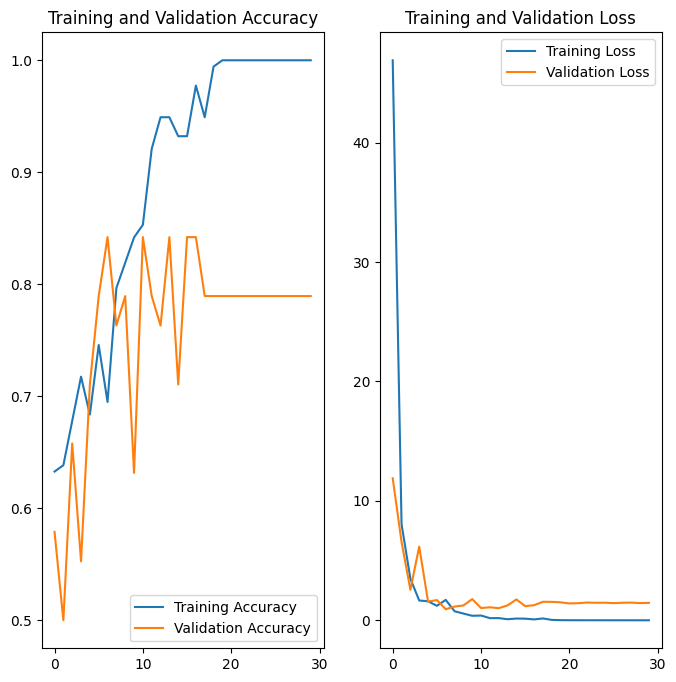

2024-04-16 22:44:37.404137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 2s/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8260869565217391
Recall: 0.8636363636363636
F1-Score: 0.8444444444444444


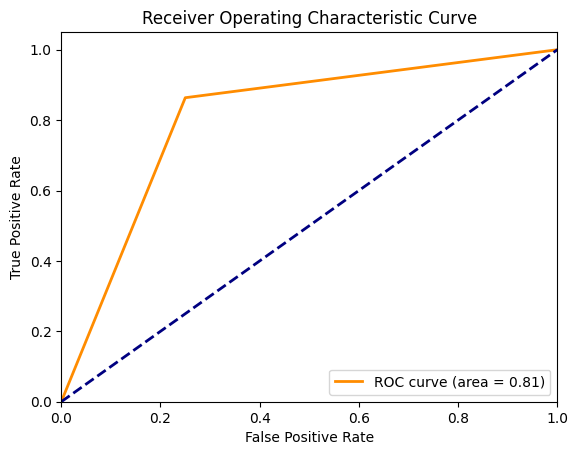

Epoch 1/30


2024-04-16 22:44:41.870038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 5.9734 - accuracy: 0.6836

2024-04-16 22:45:08.463975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 34s 702ms/step - loss: 5.9734 - accuracy: 0.6836 - val_loss: 2.6710 - val_accuracy: 0.6842
Epoch 2/30
36/36 [==============================] - 4s 121ms/step - loss: 2.0904 - accuracy: 0.6497 - val_loss: 1.3657 - val_accuracy: 0.6579
Epoch 3/30
36/36 [==============================] - 3s 95ms/step - loss: 2.1010 - accuracy: 0.6667 - val_loss: 2.2945 - val_accuracy: 0.6579
Epoch 4/30
36/36 [==============================] - 2s 42ms/step - loss: 1.8802 - accuracy: 0.6667 - val_loss: 2.0296 - val_accuracy: 0.6579
Epoch 5/30
36/36 [==============================] - 3s 73ms/step - loss: 1.5768 - accuracy: 0.6723 - val_loss: 3.0991 - val_accuracy: 0.5526
Epoch 6/30
36/36 [==============================] - 6s 184ms/step - loss: 1.1183 - accuracy: 0.7345 - val_loss: 0.8819 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 3s 91ms/step - loss: 0.8631 - accuracy: 0.7571 - val_loss: 1.2877 - val_accuracy: 0.6316
Epoch 8/30
36/36 [==

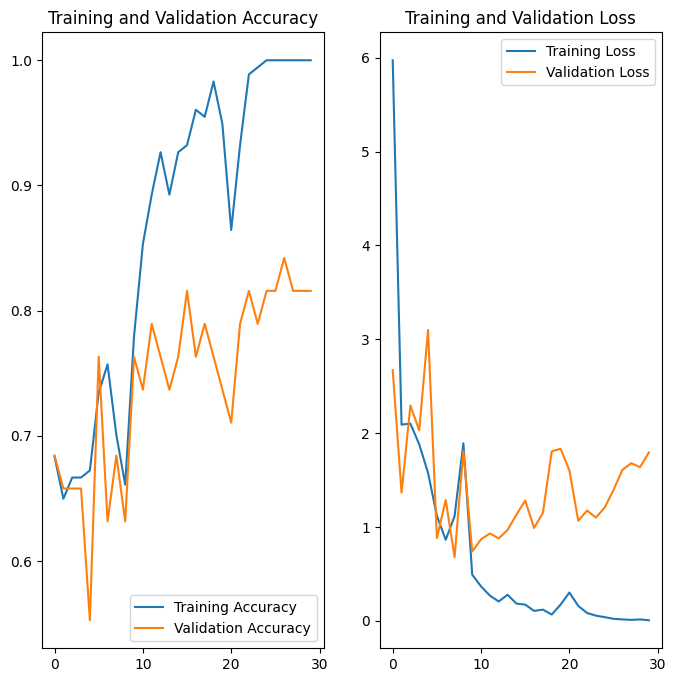

2024-04-16 22:46:06.403117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 5s 2s/step
Overall Accuracy: 0.8157894736842105
Precision: 0.7777777777777778
Recall: 0.9545454545454546
F1-Score: 0.8571428571428572


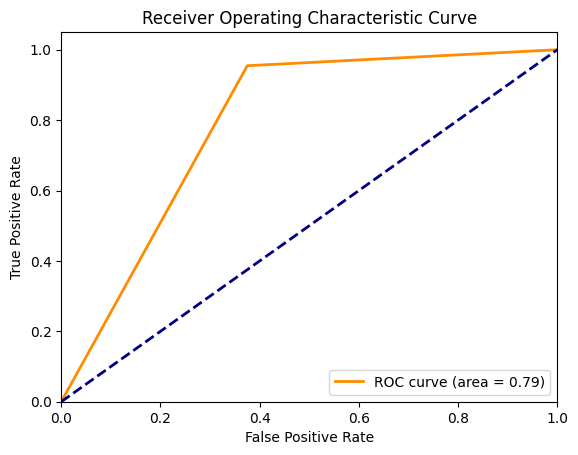

In [111]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='valid', depth_multiplier=1)(x)
    
    y = layers.Conv2D(8, (5,5), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 8, 16)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 16, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 32, 64)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 64, 128)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 128, 256)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_4 = tf.keras.Model(x,y)
    model_4._name = 'Model_4'
    
    if i == 0:
        model_4.summary()

    # COMPILING
    model_4.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # TRAINING
    epochs = 30
    history = model_4.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_4.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_4
    del history

Model: "Model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_175 (InputLayer)      [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_174 (Dept  (None, 398, 398, 1)          10        ['input_175[0][0]']           
 hwiseConv2D)                                                                                     
                                                                                                  
 conv2d_1387 (Conv2D)        (None, 398, 398, 8)          208       ['depthwise_conv2d_174[0][0]']
                                                                                                  
 max_pooling2d_744 (MaxPool  (None, 199, 199, 8)          0         ['conv2d_1387[0][0]']   

2024-04-16 22:46:11.878336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 59.4852 - accuracy: 0.5593

2024-04-16 22:46:40.581461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 37s 714ms/step - loss: 59.4852 - accuracy: 0.5593 - val_loss: 1.2768 - val_accuracy: 0.4737
Epoch 2/30
36/36 [==============================] - 5s 133ms/step - loss: 0.6815 - accuracy: 0.7006 - val_loss: 0.6971 - val_accuracy: 0.5263
Epoch 3/30
36/36 [==============================] - 4s 103ms/step - loss: 0.4841 - accuracy: 0.7853 - val_loss: 0.7440 - val_accuracy: 0.7368
Epoch 4/30
36/36 [==============================] - 3s 77ms/step - loss: 0.3699 - accuracy: 0.8362 - val_loss: 0.5516 - val_accuracy: 0.7368
Epoch 5/30
36/36 [==============================] - 2s 60ms/step - loss: 0.2488 - accuracy: 0.9096 - val_loss: 0.4514 - val_accuracy: 0.7895
Epoch 6/30
36/36 [==============================] - 2s 52ms/step - loss: 0.1655 - accuracy: 0.9435 - val_loss: 0.4552 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 2s 44ms/step - loss: 0.0864 - accuracy: 0.9887 - val_loss: 0.4373 - val_accuracy: 0.8158
Epoch 8/30
36/36 [=

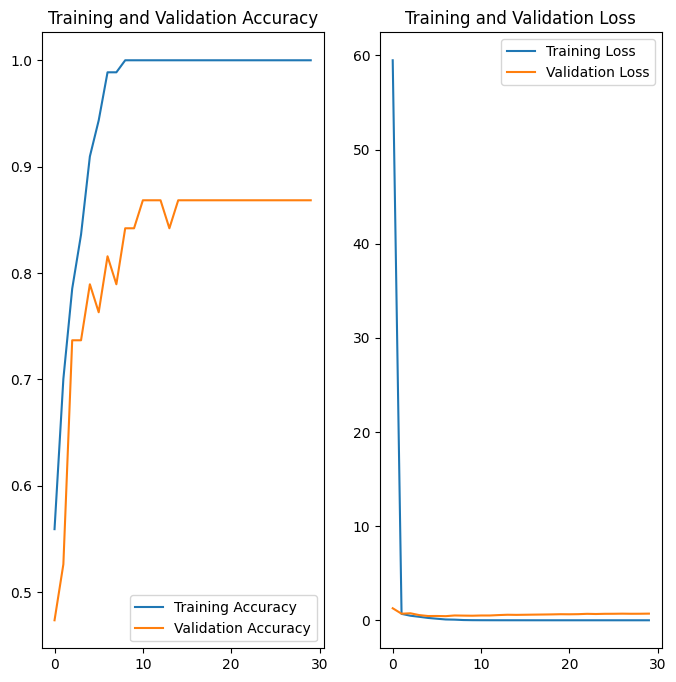

2024-04-16 22:47:39.641250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 2s/step
Overall Accuracy: 0.8421052631578947
Precision: 0.8076923076923077
Recall: 0.9545454545454546
F1-Score: 0.875


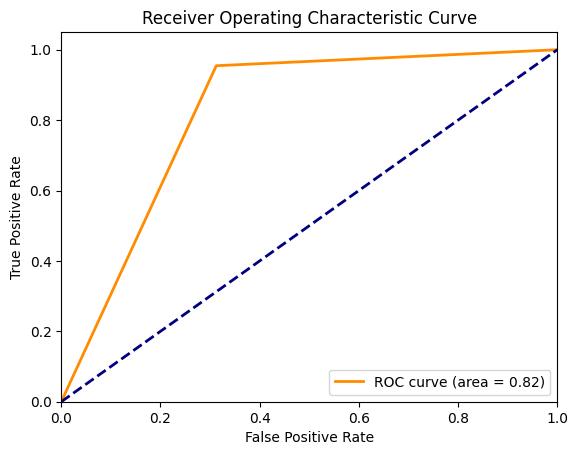

Epoch 1/30


2024-04-16 22:47:44.428791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 4.7572 - accuracy: 0.6384

2024-04-16 22:48:14.402237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 38s 755ms/step - loss: 4.7572 - accuracy: 0.6384 - val_loss: 0.5116 - val_accuracy: 0.7895
Epoch 2/30
36/36 [==============================] - 2s 61ms/step - loss: 0.5469 - accuracy: 0.7175 - val_loss: 0.7033 - val_accuracy: 0.6053
Epoch 3/30
36/36 [==============================] - 3s 94ms/step - loss: 0.5457 - accuracy: 0.7571 - val_loss: 0.4558 - val_accuracy: 0.8158
Epoch 4/30
36/36 [==============================] - 2s 43ms/step - loss: 0.4603 - accuracy: 0.7571 - val_loss: 0.4656 - val_accuracy: 0.8684
Epoch 5/30
36/36 [==============================] - 2s 64ms/step - loss: 0.3391 - accuracy: 0.8588 - val_loss: 0.3728 - val_accuracy: 0.9211
Epoch 6/30
36/36 [==============================] - 2s 59ms/step - loss: 0.2375 - accuracy: 0.9040 - val_loss: 0.4151 - val_accuracy: 0.8684
Epoch 7/30
36/36 [==============================] - 2s 51ms/step - loss: 0.1594 - accuracy: 0.9379 - val_loss: 0.7572 - val_accuracy: 0.7368
Epoch 8/30
36/36 [====

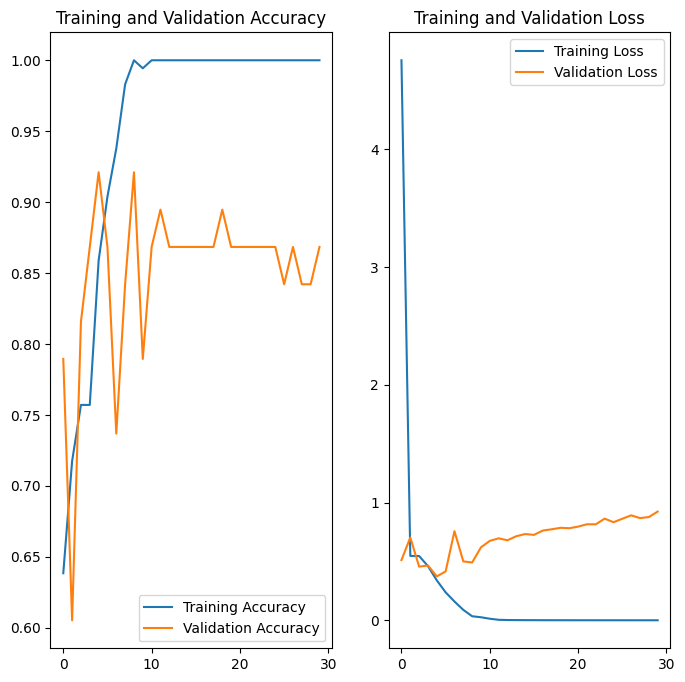

2024-04-16 22:49:08.088237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 2s/step
Overall Accuracy: 0.868421052631579
Precision: 0.8148148148148148
Recall: 1.0
F1-Score: 0.8979591836734693


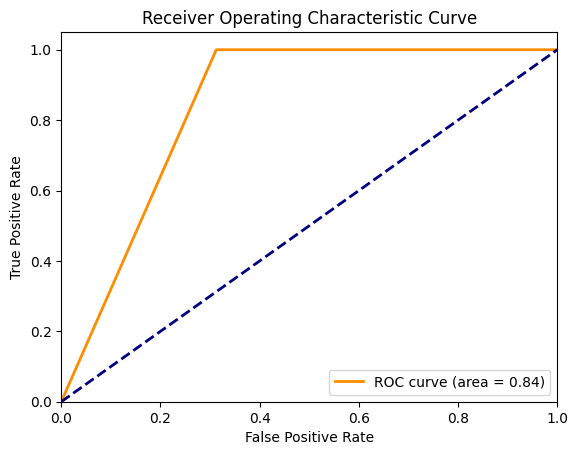

Epoch 1/30


2024-04-16 22:49:12.738430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 4.7224 - accuracy: 0.6667

2024-04-16 22:49:41.178173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 36s 722ms/step - loss: 4.7224 - accuracy: 0.6667 - val_loss: 0.5471 - val_accuracy: 0.7895
Epoch 2/30
36/36 [==============================] - 4s 125ms/step - loss: 0.5415 - accuracy: 0.7345 - val_loss: 0.5172 - val_accuracy: 0.8421
Epoch 3/30
36/36 [==============================] - 3s 96ms/step - loss: 0.4774 - accuracy: 0.7514 - val_loss: 0.4734 - val_accuracy: 0.8684
Epoch 4/30
36/36 [==============================] - 2s 46ms/step - loss: 0.3187 - accuracy: 0.8757 - val_loss: 0.4329 - val_accuracy: 0.7895
Epoch 5/30
36/36 [==============================] - 3s 96ms/step - loss: 0.1986 - accuracy: 0.9322 - val_loss: 0.4204 - val_accuracy: 0.8684
Epoch 6/30
36/36 [==============================] - 2s 49ms/step - loss: 0.0980 - accuracy: 0.9887 - val_loss: 0.7425 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 1s 28ms/step - loss: 0.1003 - accuracy: 0.9718 - val_loss: 0.4175 - val_accuracy: 0.8947
Epoch 8/30
36/36 [===

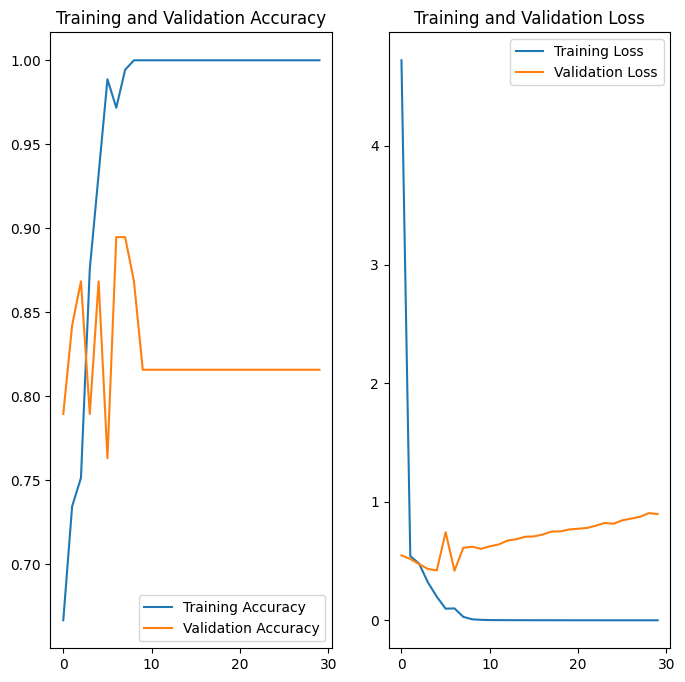

2024-04-16 22:50:35.579361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 2s/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8260869565217391
Recall: 0.8636363636363636
F1-Score: 0.8444444444444444


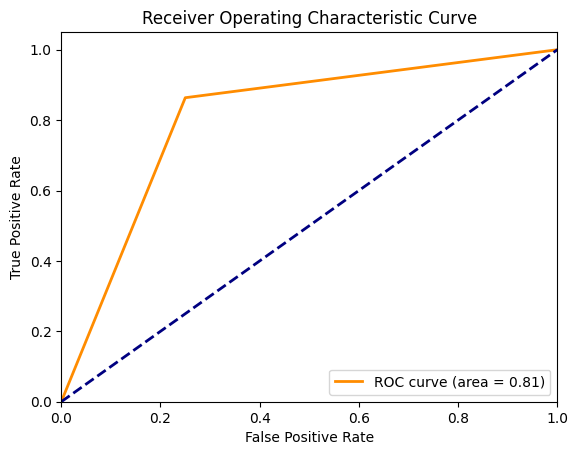

Epoch 1/30


2024-04-16 22:50:40.250862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 7.4161 - accuracy: 0.6215

2024-04-16 22:51:12.051609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 41s 797ms/step - loss: 7.4161 - accuracy: 0.6215 - val_loss: 1.0683 - val_accuracy: 0.6316
Epoch 2/30
36/36 [==============================] - 3s 92ms/step - loss: 0.7167 - accuracy: 0.7006 - val_loss: 0.4512 - val_accuracy: 0.8158
Epoch 3/30
36/36 [==============================] - 3s 83ms/step - loss: 0.5177 - accuracy: 0.7571 - val_loss: 0.4838 - val_accuracy: 0.8158
Epoch 4/30
36/36 [==============================] - 4s 103ms/step - loss: 0.4484 - accuracy: 0.7740 - val_loss: 0.4254 - val_accuracy: 0.7105
Epoch 5/30
36/36 [==============================] - 2s 56ms/step - loss: 0.3284 - accuracy: 0.8418 - val_loss: 0.3774 - val_accuracy: 0.8421
Epoch 6/30
36/36 [==============================] - 1s 33ms/step - loss: 0.2148 - accuracy: 0.9209 - val_loss: 0.4313 - val_accuracy: 0.7895
Epoch 7/30
36/36 [==============================] - 2s 44ms/step - loss: 0.1793 - accuracy: 0.9492 - val_loss: 0.3573 - val_accuracy: 0.8684
Epoch 8/30
36/36 [===

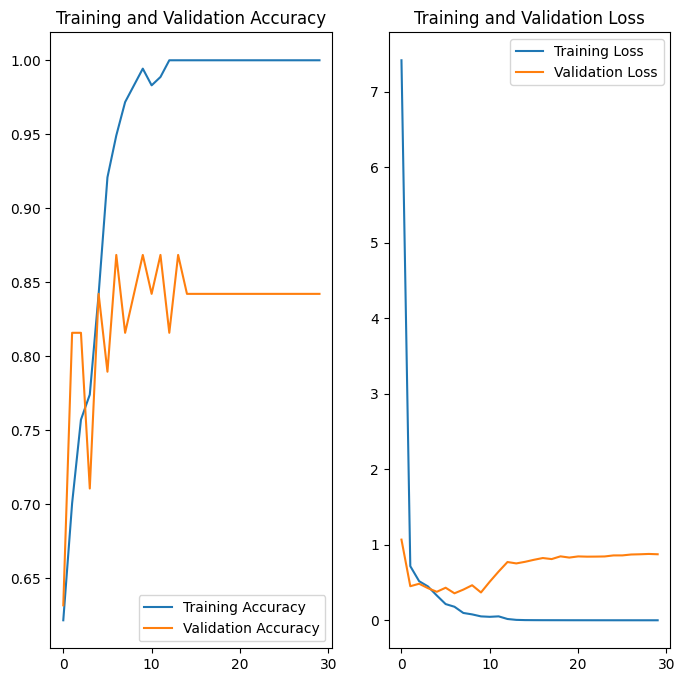

2024-04-16 22:52:06.695436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 2s/step
Overall Accuracy: 0.868421052631579
Precision: 0.84
Recall: 0.9545454545454546
F1-Score: 0.8936170212765958


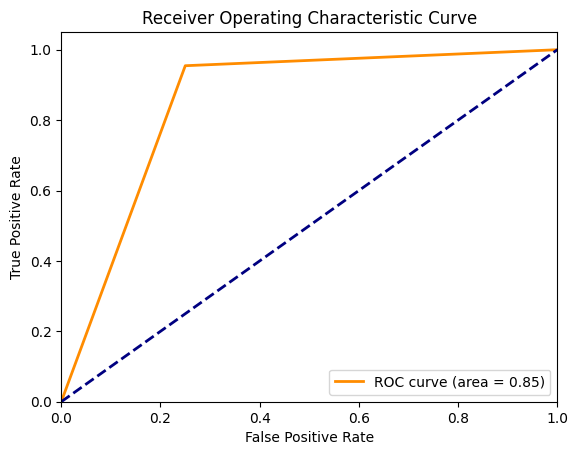

Epoch 1/30


2024-04-16 22:52:11.326685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 4.8287 - accuracy: 0.6328

2024-04-16 22:52:42.268579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 39s 774ms/step - loss: 4.8287 - accuracy: 0.6328 - val_loss: 0.6965 - val_accuracy: 0.7632
Epoch 2/30
36/36 [==============================] - 8s 221ms/step - loss: 0.7124 - accuracy: 0.6893 - val_loss: 0.5719 - val_accuracy: 0.7368
Epoch 3/30
36/36 [==============================] - 2s 52ms/step - loss: 0.5566 - accuracy: 0.7684 - val_loss: 0.5712 - val_accuracy: 0.7105
Epoch 4/30
36/36 [==============================] - 3s 81ms/step - loss: 0.4340 - accuracy: 0.7740 - val_loss: 0.4484 - val_accuracy: 0.8158
Epoch 5/30
36/36 [==============================] - 2s 52ms/step - loss: 0.3323 - accuracy: 0.8644 - val_loss: 0.4783 - val_accuracy: 0.7368
Epoch 6/30
36/36 [==============================] - 1s 27ms/step - loss: 0.2382 - accuracy: 0.9096 - val_loss: 0.4197 - val_accuracy: 0.7895
Epoch 7/30
36/36 [==============================] - 3s 91ms/step - loss: 0.1629 - accuracy: 0.9605 - val_loss: 0.4273 - val_accuracy: 0.7632
Epoch 8/30
36/36 [===

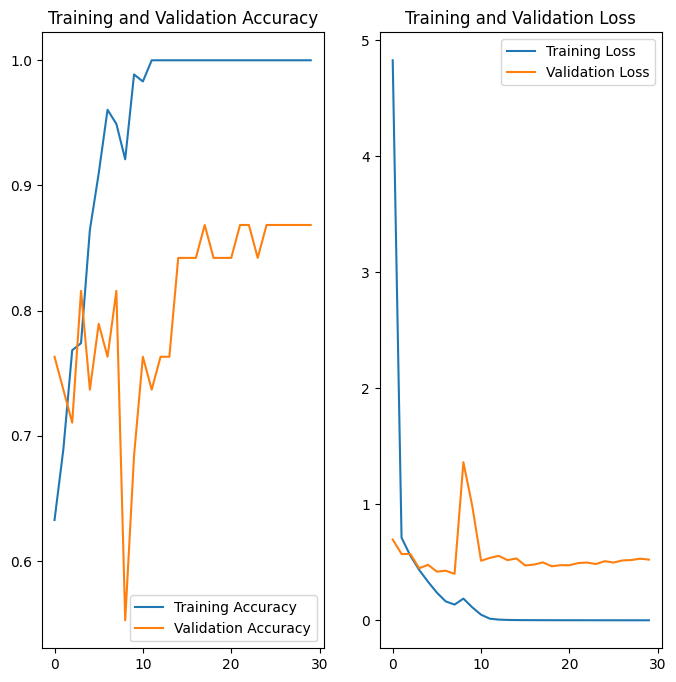

2024-04-16 22:53:36.735387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 5s 2s/step
Overall Accuracy: 0.7631578947368421
Precision: 0.782608695652174
Recall: 0.8181818181818182
F1-Score: 0.8


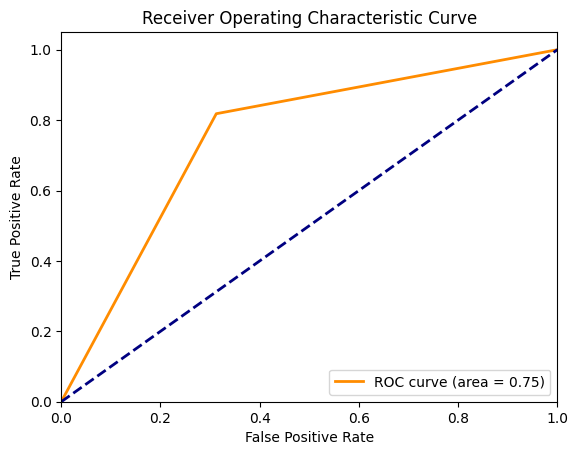

In [112]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='valid', depth_multiplier=1)(x)
    
    y = layers.Conv2D(8, (5,5), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 8, 16)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 16, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 32, 64)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 64, 128)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 128, 256)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(100, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_5 = tf.keras.Model(x,y)
    model_5._name = 'Model_5'
    
    if i == 0:
        model_5.summary()

    # COMPILING
    model_5.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # TRAINING
    epochs = 30
    history = model_5.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_5.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_5
    del history

Model: "Model_sep_conv"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 conv2d_72 (Conv2D)          (None, 400, 400, 8)          16        ['input_19[0][0]']            
                                                                                                  
 conv2d_73 (Conv2D)          (None, 400, 400, 8)          80        ['input_19[0][0]']            
                                                                                                  
 concatenate_72 (Concatenat  (None, 400, 400, 16)         0         ['conv2d_72[0][0]',           
 e)                                                                  'conv2d_73[0][0]

2024-04-18 14:20:49.021301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 11.1334 - accuracy: 0.6780

2024-04-18 14:20:51.942424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 4s 76ms/step - loss: 11.1334 - accuracy: 0.6780 - val_loss: 9.2231 - val_accuracy: 0.4474
Epoch 2/30
36/36 [==============================] - 1s 32ms/step - loss: 2.6136 - accuracy: 0.7853 - val_loss: 3.1297 - val_accuracy: 0.6316
Epoch 3/30
36/36 [==============================] - 1s 28ms/step - loss: 0.9838 - accuracy: 0.8362 - val_loss: 3.4421 - val_accuracy: 0.6579
Epoch 4/30
36/36 [==============================] - 1s 33ms/step - loss: 0.1624 - accuracy: 0.9548 - val_loss: 3.3742 - val_accuracy: 0.7895
Epoch 5/30
36/36 [==============================] - 1s 30ms/step - loss: 0.1122 - accuracy: 0.9492 - val_loss: 3.2533 - val_accuracy: 0.6579
Epoch 6/30
36/36 [==============================] - 1s 27ms/step - loss: 0.1592 - accuracy: 0.9492 - val_loss: 4.2316 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 1s 28ms/step - loss: 0.3632 - accuracy: 0.9096 - val_loss: 3.3995 - val_accuracy: 0.7895
Epoch 8/30
36/36 [=====

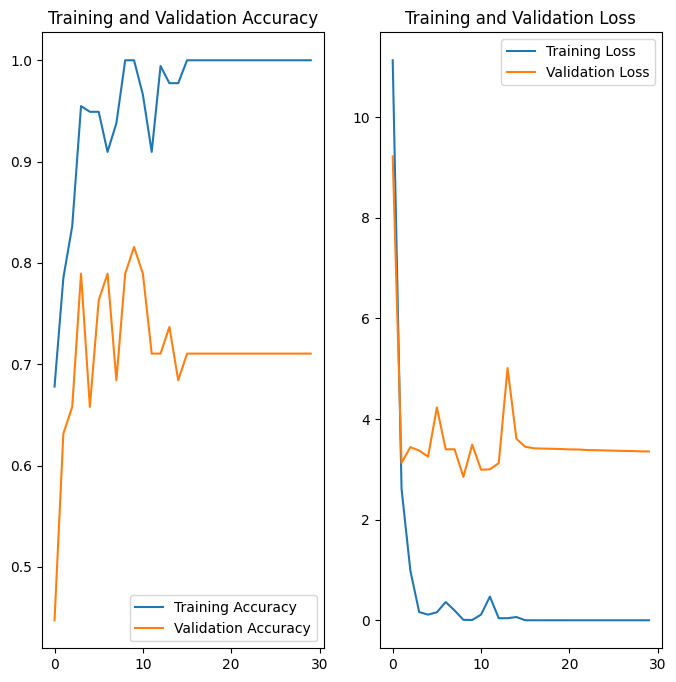

1/2 [==============>...............] - ETA: 0s

2024-04-18 14:21:21.287495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 252ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8
Recall: 0.9090909090909091
F1-Score: 0.8510638297872342


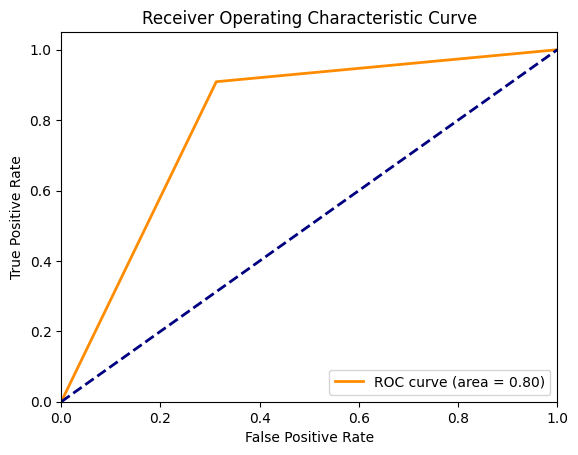

Epoch 1/30


2024-04-18 14:21:22.093001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 8.0333 - accuracy: 0.6497

2024-04-18 14:21:24.916629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 4s 76ms/step - loss: 8.0333 - accuracy: 0.6497 - val_loss: 11.5311 - val_accuracy: 0.6053
Epoch 2/30
36/36 [==============================] - 1s 35ms/step - loss: 4.7933 - accuracy: 0.7514 - val_loss: 4.8298 - val_accuracy: 0.7105
Epoch 3/30
36/36 [==============================] - 1s 27ms/step - loss: 2.2508 - accuracy: 0.8475 - val_loss: 14.3821 - val_accuracy: 0.7105
Epoch 4/30
36/36 [==============================] - 1s 31ms/step - loss: 9.3466 - accuracy: 0.7175 - val_loss: 5.7755 - val_accuracy: 0.6579
Epoch 5/30
36/36 [==============================] - 1s 29ms/step - loss: 3.2977 - accuracy: 0.7966 - val_loss: 3.7507 - val_accuracy: 0.6316
Epoch 6/30
36/36 [==============================] - 1s 26ms/step - loss: 2.3942 - accuracy: 0.8192 - val_loss: 3.9569 - val_accuracy: 0.7105
Epoch 7/30
36/36 [==============================] - 1s 27ms/step - loss: 0.2988 - accuracy: 0.9492 - val_loss: 3.6187 - val_accuracy: 0.7105
Epoch 8/30
36/36 [====

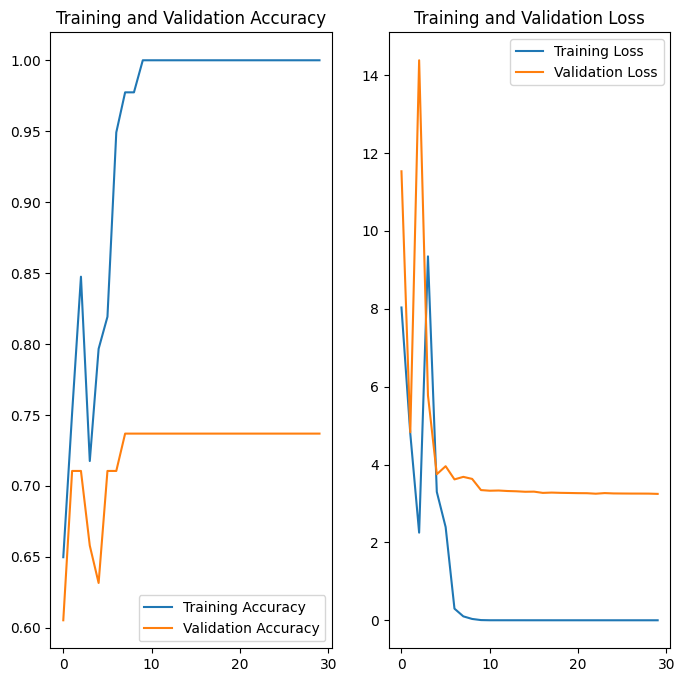

1/2 [==============>...............] - ETA: 0s

2024-04-18 14:21:53.970120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 135ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.7777777777777778
Recall: 0.9545454545454546
F1-Score: 0.8571428571428572


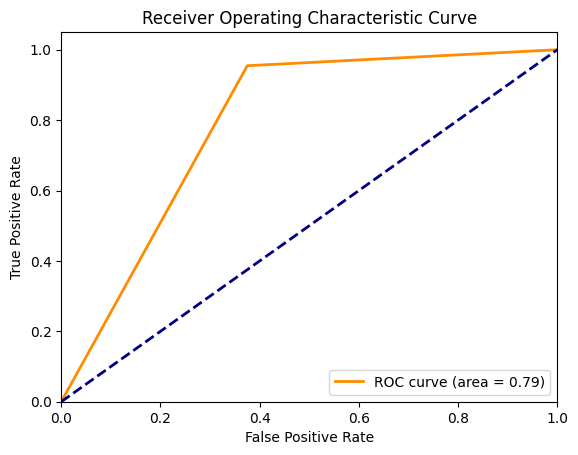

Epoch 1/30


2024-04-18 14:21:54.665541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 7.9760 - accuracy: 0.6328

2024-04-18 14:21:57.925106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 4s 88ms/step - loss: 7.9760 - accuracy: 0.6328 - val_loss: 7.1084 - val_accuracy: 0.6842
Epoch 2/30
36/36 [==============================] - 1s 30ms/step - loss: 2.4182 - accuracy: 0.7853 - val_loss: 2.5419 - val_accuracy: 0.7105
Epoch 3/30
36/36 [==============================] - 1s 28ms/step - loss: 0.8958 - accuracy: 0.8644 - val_loss: 6.6816 - val_accuracy: 0.6842
Epoch 4/30
36/36 [==============================] - 1s 29ms/step - loss: 1.1467 - accuracy: 0.8305 - val_loss: 3.0889 - val_accuracy: 0.7105
Epoch 5/30
36/36 [==============================] - 1s 30ms/step - loss: 0.1245 - accuracy: 0.9548 - val_loss: 2.9258 - val_accuracy: 0.7632
Epoch 6/30
36/36 [==============================] - 1s 29ms/step - loss: 0.0291 - accuracy: 0.9887 - val_loss: 2.8505 - val_accuracy: 0.7895
Epoch 7/30
36/36 [==============================] - 2s 45ms/step - loss: 0.0389 - accuracy: 0.9831 - val_loss: 3.2988 - val_accuracy: 0.7632
Epoch 8/30
36/36 [======

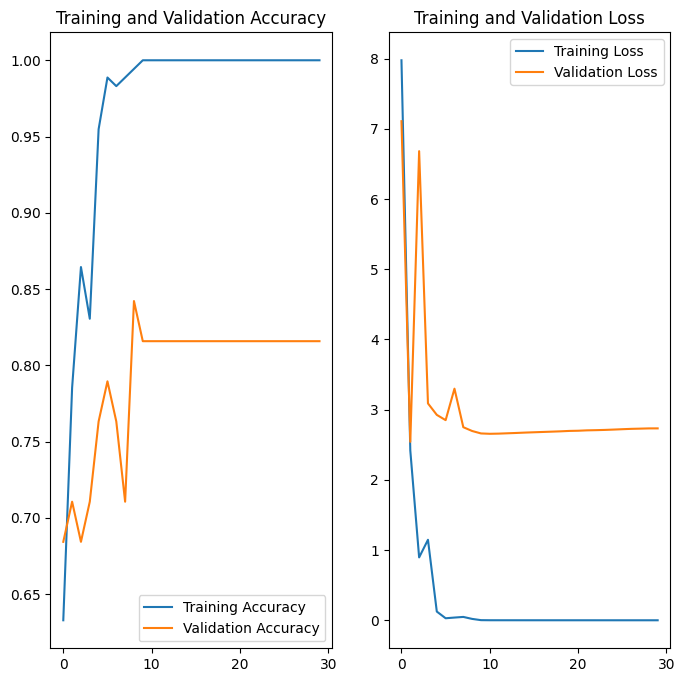

1/2 [==============>...............] - ETA: 0s

2024-04-18 14:22:28.035960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 231ms/step
Overall Accuracy: 0.868421052631579
Precision: 0.84
Recall: 0.9545454545454546
F1-Score: 0.8936170212765958


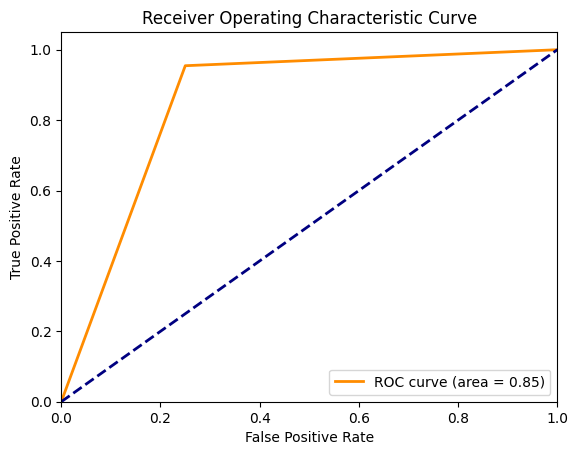

Epoch 1/30


2024-04-18 14:22:28.836041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 31.1896 - accuracy: 0.5650

2024-04-18 14:22:31.959777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 4s 88ms/step - loss: 31.1896 - accuracy: 0.5650 - val_loss: 46.6311 - val_accuracy: 0.6053
Epoch 2/30
36/36 [==============================] - 1s 33ms/step - loss: 15.6176 - accuracy: 0.6836 - val_loss: 11.8793 - val_accuracy: 0.6316
Epoch 3/30
36/36 [==============================] - 1s 29ms/step - loss: 5.2389 - accuracy: 0.7910 - val_loss: 10.5637 - val_accuracy: 0.6842
Epoch 4/30
36/36 [==============================] - 1s 31ms/step - loss: 3.5196 - accuracy: 0.7797 - val_loss: 8.0782 - val_accuracy: 0.6053
Epoch 5/30
36/36 [==============================] - 1s 27ms/step - loss: 2.9887 - accuracy: 0.7966 - val_loss: 6.8037 - val_accuracy: 0.6053
Epoch 6/30
36/36 [==============================] - 1s 28ms/step - loss: 1.6037 - accuracy: 0.8531 - val_loss: 5.3443 - val_accuracy: 0.6842
Epoch 7/30
36/36 [==============================] - 1s 26ms/step - loss: 0.9479 - accuracy: 0.8701 - val_loss: 6.6580 - val_accuracy: 0.6842
Epoch 8/30
36/36 [=

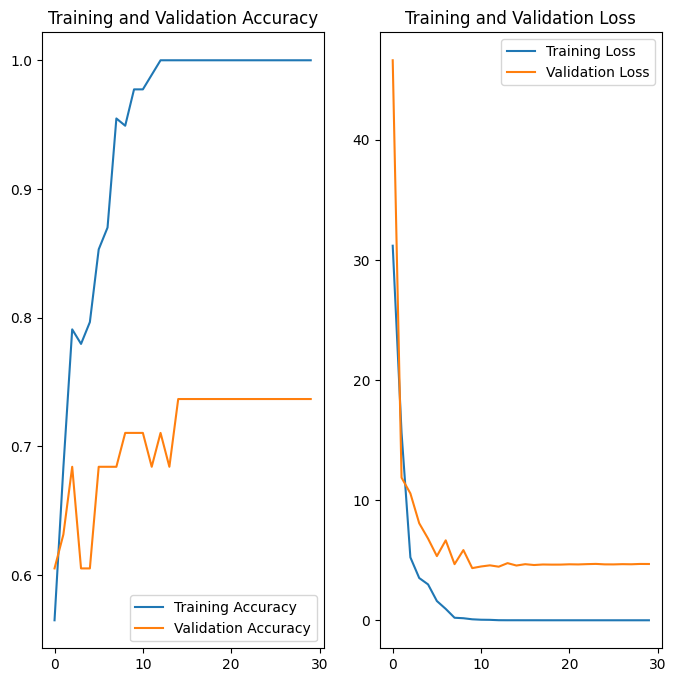

1/2 [==============>...............] - ETA: 0s

2024-04-18 14:23:01.547032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 168ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8
Recall: 0.9090909090909091
F1-Score: 0.8510638297872342


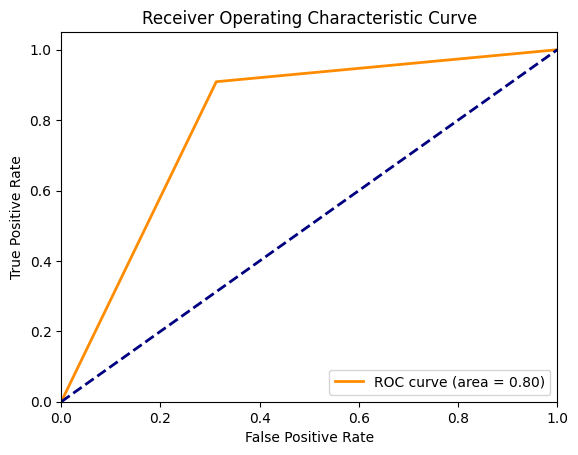

Epoch 1/30


2024-04-18 14:23:02.277758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 17.4003 - accuracy: 0.6215

2024-04-18 14:23:05.081328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 4s 72ms/step - loss: 17.4003 - accuracy: 0.6215 - val_loss: 9.1804 - val_accuracy: 0.6579
Epoch 2/30
36/36 [==============================] - 1s 36ms/step - loss: 6.1401 - accuracy: 0.7458 - val_loss: 6.9230 - val_accuracy: 0.6316
Epoch 3/30
36/36 [==============================] - 1s 30ms/step - loss: 3.1907 - accuracy: 0.7910 - val_loss: 3.6152 - val_accuracy: 0.6842
Epoch 4/30
36/36 [==============================] - 1s 32ms/step - loss: 1.0822 - accuracy: 0.8362 - val_loss: 2.8049 - val_accuracy: 0.6842
Epoch 5/30
36/36 [==============================] - 1s 28ms/step - loss: 0.5629 - accuracy: 0.9096 - val_loss: 3.4645 - val_accuracy: 0.7105
Epoch 6/30
36/36 [==============================] - 1s 37ms/step - loss: 0.2038 - accuracy: 0.9322 - val_loss: 4.2964 - val_accuracy: 0.7368
Epoch 7/30
36/36 [==============================] - 1s 28ms/step - loss: 0.1352 - accuracy: 0.9605 - val_loss: 2.5100 - val_accuracy: 0.7105
Epoch 8/30
36/36 [=====

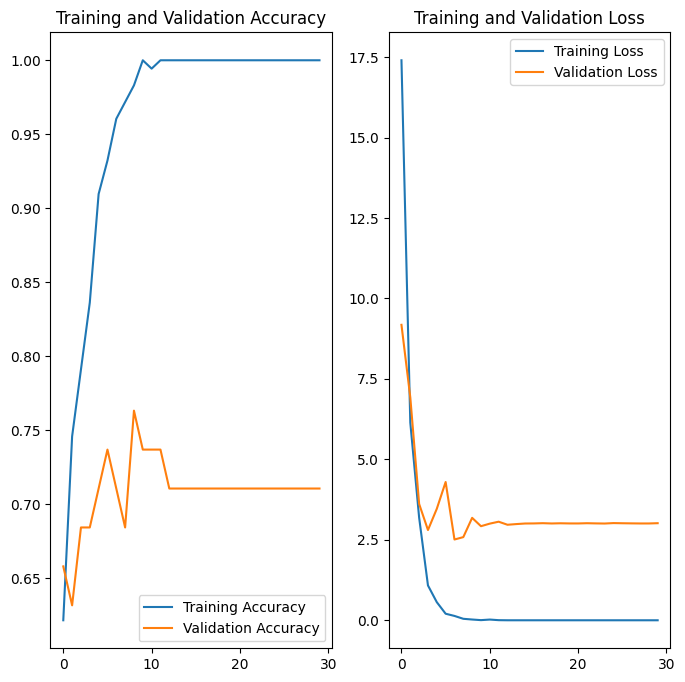

1/2 [==============>...............] - ETA: 0s

2024-04-18 14:23:35.119215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 198ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.7777777777777778
Recall: 0.9545454545454546
F1-Score: 0.8571428571428572


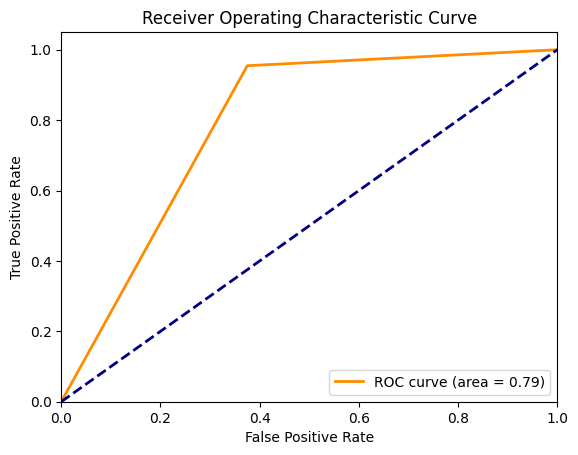

In [21]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    
    y1 = layers.Conv2D(8,(1,1) ,strides=(1,1), padding='same')(x)
    y2 = layers.Conv2D(8, (3,3), padding='same')(x)
    y = layers.Concatenate()([y1,y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y1 = layers.Conv2D(16, (1,1), padding='same')(y)
    y2 = layers.Conv2D(16, (3,3), padding='same')(y)
    y = layers.Concatenate()([y1, y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y1 = layers.SeparableConv2D(20, (1,1), padding='same')(y)
    y2 = layers.SeparableConv2D(20, (3,3), padding='same')(y)
    y = layers.Concatenate()([y1, y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
    
    y1 = layers.SeparableConv2D(20, (1,1), padding='same')(y)
    y2 = layers.SeparableConv2D(20, (3,3), padding='same')(y)
    y = layers.Concatenate()([y1, y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
 
    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y) 
    y = layers.Dense(1, activation='sigmoid')(y)

    model_sep_conv = tf.keras.Model(x,y)
    model_sep_conv._name = 'Model_sep_conv'
    
    if i == 0:
        model_sep_conv.summary()

    # COMPILING
    model_sep_conv.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # TRAINING
    epochs = 30
    history = model_sep_conv.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_sep_conv.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_sep_conv
    del history

Model: "Model_sep_conv_CD"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_24 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 conv2d_92 (Conv2D)          (None, 400, 400, 8)          16        ['input_24[0][0]']            
                                                                                                  
 conv2d_93 (Conv2D)          (None, 400, 400, 8)          80        ['input_24[0][0]']            
                                                                                                  
 concatenate_92 (Concatenat  (None, 400, 400, 16)         0         ['conv2d_92[0][0]',           
 e)                                                                  'conv2d_93[0]

2024-04-18 14:28:25.534755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 11.4106 - accuracy: 0.7006

2024-04-18 14:28:28.743132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 4s 87ms/step - loss: 11.4106 - accuracy: 0.7006 - val_loss: 11.7693 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 34ms/step - loss: 5.0914 - accuracy: 0.7684 - val_loss: 9.4264 - val_accuracy: 0.7895 - lr: 9.9726e-04
Epoch 3/30
36/36 [==============================] - 1s 29ms/step - loss: 0.8660 - accuracy: 0.9209 - val_loss: 3.9362 - val_accuracy: 0.6579 - lr: 9.8908e-04
Epoch 4/30
36/36 [==============================] - 1s 27ms/step - loss: 0.1337 - accuracy: 0.9605 - val_loss: 3.3548 - val_accuracy: 0.7105 - lr: 9.7554e-04
Epoch 5/30
36/36 [==============================] - 1s 29ms/step - loss: 0.1356 - accuracy: 0.9605 - val_loss: 3.1585 - val_accuracy: 0.7105 - lr: 9.5679e-04
Epoch 6/30
36/36 [==============================] - 1s 27ms/step - loss: 0.0320 - accuracy: 0.9831 - val_loss: 3.0855 - val_accuracy: 0.7105 - lr: 9.3304e-04
Epoch 7/30
36/36 [==============================] - 1s 26ms/step 

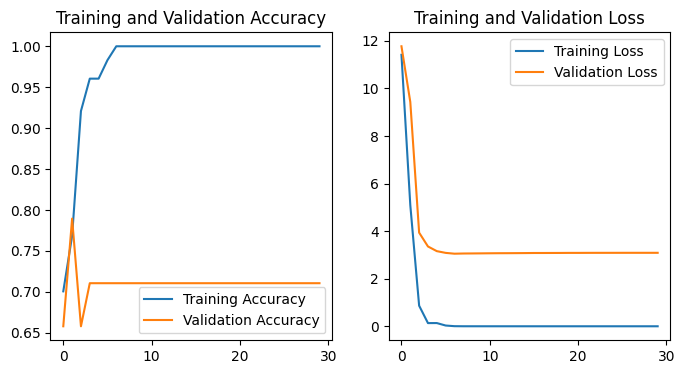

2024-04-18 14:28:58.551099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 231ms/step
Overall Accuracy: 0.7894736842105263
Precision: 0.8181818181818182
Recall: 0.8181818181818182
F1-Score: 0.8181818181818182


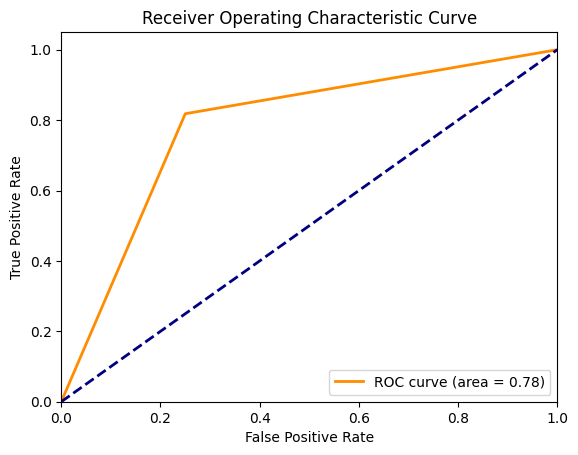

Epoch 1/30


2024-04-18 14:28:59.457385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 15.7159 - accuracy: 0.6328

2024-04-18 14:29:03.221406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 5s 89ms/step - loss: 15.7159 - accuracy: 0.6328 - val_loss: 16.1907 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 36ms/step - loss: 4.9594 - accuracy: 0.7458 - val_loss: 3.7671 - val_accuracy: 0.6053 - lr: 9.9726e-04
Epoch 3/30
36/36 [==============================] - 1s 29ms/step - loss: 0.6824 - accuracy: 0.8757 - val_loss: 1.8391 - val_accuracy: 0.7105 - lr: 9.8908e-04
Epoch 4/30
36/36 [==============================] - 1s 26ms/step - loss: 0.0881 - accuracy: 0.9718 - val_loss: 1.7125 - val_accuracy: 0.7632 - lr: 9.7554e-04
Epoch 5/30
36/36 [==============================] - 1s 29ms/step - loss: 0.0210 - accuracy: 0.9944 - val_loss: 1.7902 - val_accuracy: 0.7895 - lr: 9.5679e-04
Epoch 6/30
36/36 [==============================] - 1s 31ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 1.7659 - val_accuracy: 0.8158 - lr: 9.3304e-04
Epoch 7/30
36/36 [==============================] - 1s 27ms/step 

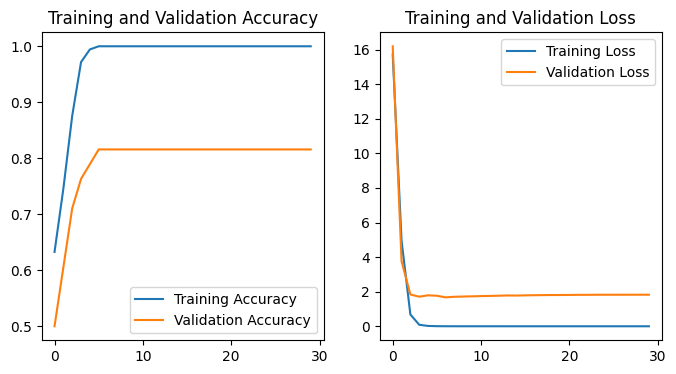

1/2 [==============>...............] - ETA: 0s

2024-04-18 14:29:32.942528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 293ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.8333333333333334
Recall: 0.9090909090909091
F1-Score: 0.8695652173913043


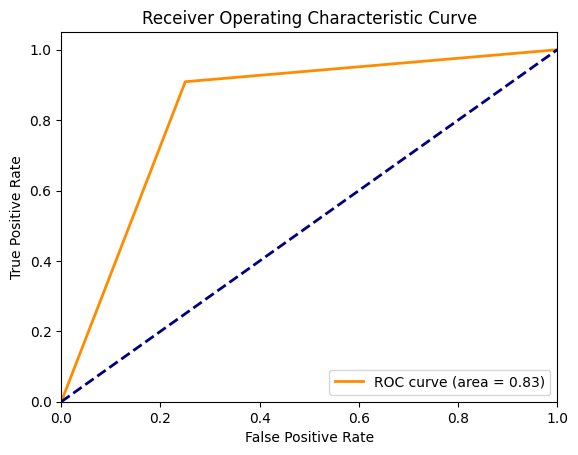

Epoch 1/30


2024-04-18 14:29:33.806607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 11.2952 - accuracy: 0.6441

2024-04-18 14:29:36.887845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 4s 87ms/step - loss: 11.2952 - accuracy: 0.6441 - val_loss: 17.6360 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 36ms/step - loss: 7.0024 - accuracy: 0.7853 - val_loss: 5.4701 - val_accuracy: 0.6316 - lr: 9.9726e-04
Epoch 3/30
36/36 [==============================] - 1s 41ms/step - loss: 1.6782 - accuracy: 0.8814 - val_loss: 5.2828 - val_accuracy: 0.7895 - lr: 9.8908e-04
Epoch 4/30
36/36 [==============================] - 1s 30ms/step - loss: 1.7111 - accuracy: 0.8588 - val_loss: 3.4044 - val_accuracy: 0.6579 - lr: 9.7554e-04
Epoch 5/30
36/36 [==============================] - 1s 31ms/step - loss: 0.1988 - accuracy: 0.9605 - val_loss: 3.2141 - val_accuracy: 0.7895 - lr: 9.5679e-04
Epoch 6/30
36/36 [==============================] - 1s 33ms/step - loss: 0.1241 - accuracy: 0.9661 - val_loss: 3.2588 - val_accuracy: 0.7632 - lr: 9.3304e-04
Epoch 7/30
36/36 [==============================] - 1s 27ms/step 

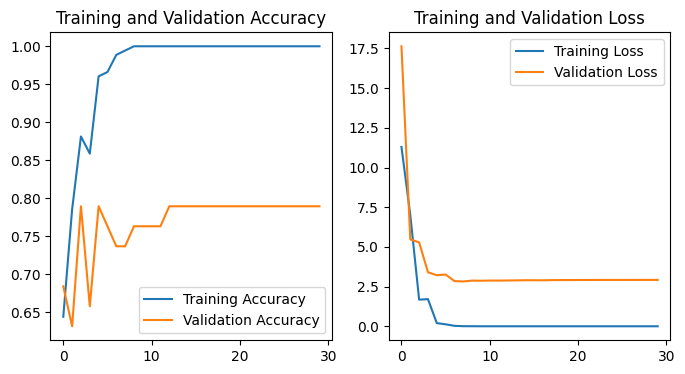

2024-04-18 14:30:08.148240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 261ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.8333333333333334
Recall: 0.9090909090909091
F1-Score: 0.8695652173913043


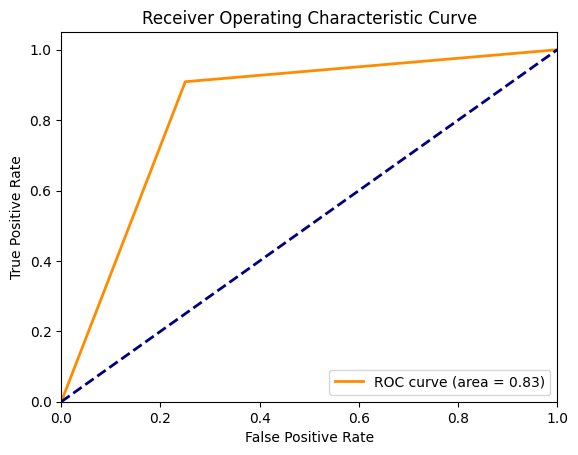

In [22]:
for i in range(3):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    
    y1 = layers.Conv2D(8,(1,1) ,strides=(1,1), padding='same')(x)
    y2 = layers.Conv2D(8, (3,3), padding='same')(x)
    y = layers.Concatenate()([y1,y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y1 = layers.Conv2D(16, (1,1), padding='same')(y)
    y2 = layers.Conv2D(16, (3,3), padding='same')(y)
    y = layers.Concatenate()([y1, y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y1 = layers.SeparableConv2D(20, (1,1), padding='same')(y)
    y2 = layers.SeparableConv2D(20, (3,3), padding='same')(y)
    y = layers.Concatenate()([y1, y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
    
    y1 = layers.SeparableConv2D(20, (1,1), padding='same')(y)
    y2 = layers.SeparableConv2D(20, (3,3), padding='same')(y)
    y = layers.Concatenate()([y1, y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
 
    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y) 
    y = layers.Dense(1, activation='sigmoid')(y)

    model_sep_conv_CD = tf.keras.Model(x,y)
    model_sep_conv_CD._name = 'Model_sep_conv_CD'
    
    if i == 0:
        model_sep_conv_CD.summary()

    # COMPILING
    model_sep_conv_CD.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # SCHEDULER
    lr_scheduler = LearningRateScheduler(tf.keras.optimizers.schedules.CosineDecay(
        initial_learning_rate = 0.001,
        decay_steps = 30,
        alpha=0.001/3,
        name='CosineDecay'
        ))
    
    # TRAINING
    epochs = 30
    history = model_sep_conv_CD.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val),
                          callbacks=[lr_scheduler])

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_sep_conv_CD.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_sep_conv_CD
    del history


Model: "Model_2_RLR"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_27 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 conv2d_104 (Conv2D)         (None, 400, 400, 8)          16        ['input_27[0][0]']            
                                                                                                  
 conv2d_105 (Conv2D)         (None, 400, 400, 8)          80        ['input_27[0][0]']            
                                                                                                  
 concatenate_104 (Concatena  (None, 400, 400, 16)         0         ['conv2d_104[0][0]',          
 te)                                                                 'conv2d_105[0][0]']

2024-04-18 14:30:33.620256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 15.8513 - accuracy: 0.5989

2024-04-18 14:30:36.512163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 4s 75ms/step - loss: 15.8513 - accuracy: 0.5989 - val_loss: 4.9653 - val_accuracy: 0.6316 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 33ms/step - loss: 5.3401 - accuracy: 0.7514 - val_loss: 6.1171 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 34ms/step - loss: 2.1475 - accuracy: 0.7797 - val_loss: 4.7354 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 26ms/step - loss: 1.7151 - accuracy: 0.8531 - val_loss: 3.4323 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 31ms/step - loss: 0.3075 - accuracy: 0.9492 - val_loss: 3.0477 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 27ms/step - loss: 0.1877 - accuracy: 0.9435 - val_loss: 2.6856 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 26ms/step - loss: 0.1344 - accu

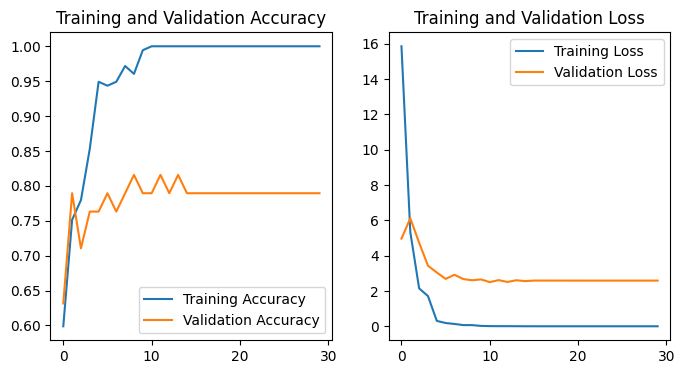

1/2 [==============>...............] - ETA: 0s

2024-04-18 14:31:06.218220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 180ms/step
Overall Accuracy: 0.8947368421052632
Precision: 0.875
Recall: 0.9545454545454546
F1-Score: 0.9130434782608695


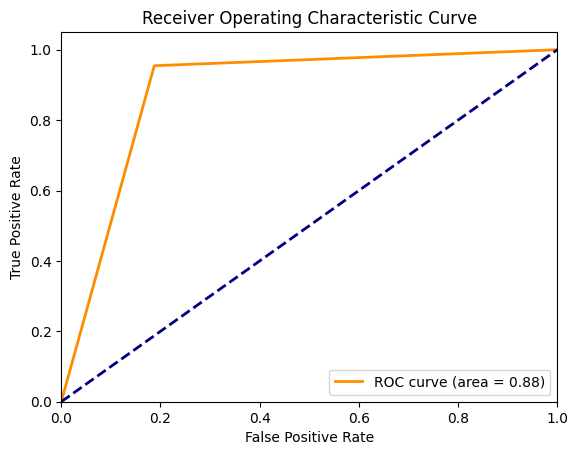

Epoch 1/30


2024-04-18 14:31:07.934839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 25.2776 - accuracy: 0.5819

2024-04-18 14:31:11.314516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 5s 95ms/step - loss: 25.2776 - accuracy: 0.5819 - val_loss: 14.5294 - val_accuracy: 0.6316 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 36ms/step - loss: 4.5715 - accuracy: 0.8249 - val_loss: 4.3702 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 34ms/step - loss: 0.5580 - accuracy: 0.9266 - val_loss: 3.1377 - val_accuracy: 0.5789 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 29ms/step - loss: 0.4316 - accuracy: 0.8983 - val_loss: 2.6563 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 33ms/step - loss: 0.0804 - accuracy: 0.9774 - val_loss: 3.1848 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 32ms/step - loss: 0.0428 - accuracy: 0.9944 - val_loss: 2.4528 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 28ms/step - loss: 0.0194 - acc

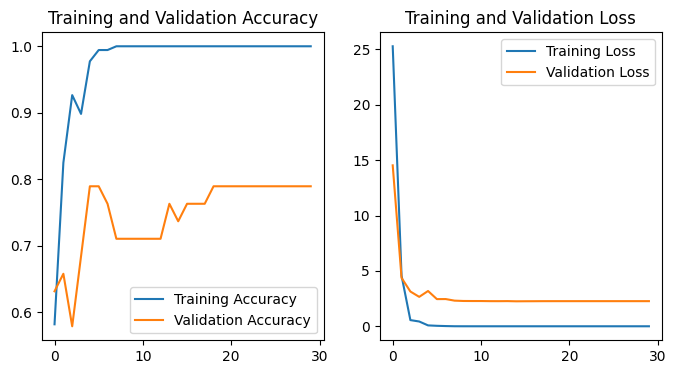

1/2 [==============>...............] - ETA: 0s

2024-04-18 14:31:41.894445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 140ms/step
Overall Accuracy: 0.868421052631579
Precision: 0.84
Recall: 0.9545454545454546
F1-Score: 0.8936170212765958


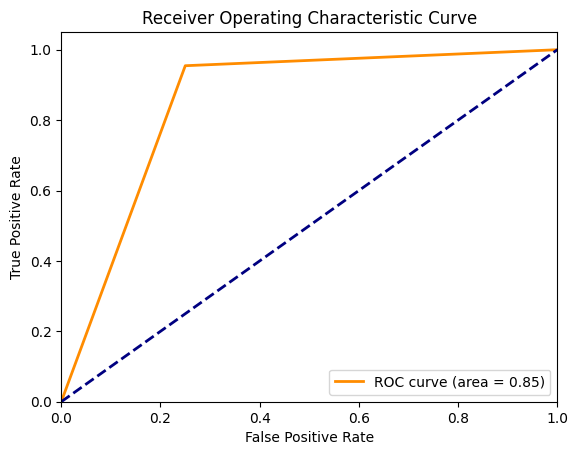

Epoch 1/30


2024-04-18 14:31:42.615380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 52.8708 - accuracy: 0.5311

2024-04-18 14:31:46.096619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 5s 100ms/step - loss: 52.8708 - accuracy: 0.5311 - val_loss: 61.5714 - val_accuracy: 0.6053 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 34ms/step - loss: 64.3564 - accuracy: 0.6554 - val_loss: 64.5977 - val_accuracy: 0.6053 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 30ms/step - loss: 27.1427 - accuracy: 0.7232 - val_loss: 28.8055 - val_accuracy: 0.6316 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 29ms/step - loss: 18.3937 - accuracy: 0.7401 - val_loss: 32.2481 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 31ms/step - loss: 18.8187 - accuracy: 0.7345 - val_loss: 26.2839 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 28ms/step - loss: 17.3163 - accuracy: 0.7797 - val_loss: 26.7975 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 26ms/step - loss: 1

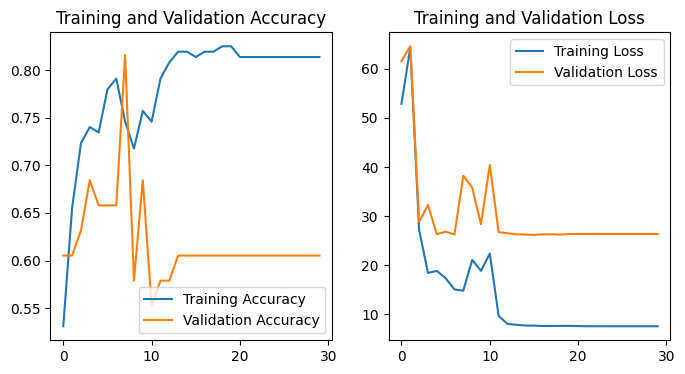

2024-04-18 14:32:16.033349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 215ms/step
Overall Accuracy: 0.7631578947368421
Precision: 0.76
Recall: 0.8636363636363636
F1-Score: 0.8085106382978724


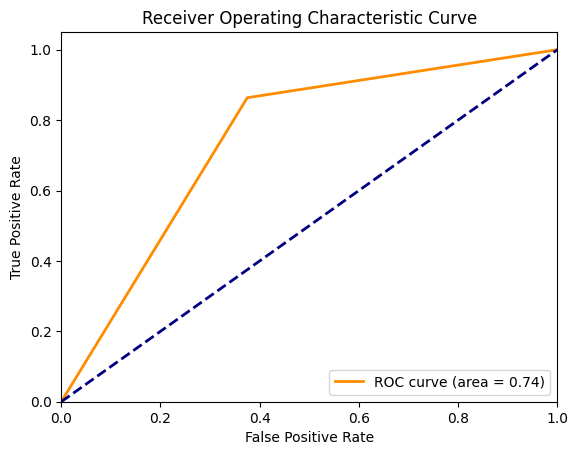

In [23]:
for i in range(3):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    
    y1 = layers.Conv2D(8,(1,1) ,strides=(1,1), padding='same')(x)
    y2 = layers.Conv2D(8, (3,3), padding='same')(x)
    y = layers.Concatenate()([y1,y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y1 = layers.Conv2D(16, (1,1), padding='same')(y)
    y2 = layers.Conv2D(16, (3,3), padding='same')(y)
    y = layers.Concatenate()([y1, y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y1 = layers.SeparableConv2D(20, (1,1), padding='same')(y)
    y2 = layers.SeparableConv2D(20, (3,3), padding='same')(y)
    y = layers.Concatenate()([y1, y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
    
    y1 = layers.SeparableConv2D(20, (1,1), padding='same')(y)
    y2 = layers.SeparableConv2D(20, (3,3), padding='same')(y)
    y = layers.Concatenate()([y1, y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
 
    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y) 
    y = layers.Dense(1, activation='sigmoid')(y)

    model_sep_conv_RLR = tf.keras.Model(x,y)
    model_sep_conv_RLR._name = 'Model_sep_conv_RLR'
    
    if i == 0:
        model_sep_conv_RLR.summary()

    # COMPILING
    model_sep_conv_RLR.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # SCHEDULER
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.01,
        patience=5,
        verbose=0,
        mode='auto',
        min_delta=0.001,
        cooldown=0,
        min_lr=0.0,
        
    )
    
    # TRAINING
    epochs = 30
    history = model_sep_conv_RLR.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val),
                          callbacks=[lr_scheduler])

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_sep_conv_RLR.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_sep_conv_RLR
    del history


Model: "Model_2_ES"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_31 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 conv2d_120 (Conv2D)         (None, 400, 400, 8)          16        ['input_31[0][0]']            
                                                                                                  
 conv2d_121 (Conv2D)         (None, 400, 400, 8)          80        ['input_31[0][0]']            
                                                                                                  
 concatenate_120 (Concatena  (None, 400, 400, 16)         0         ['conv2d_120[0][0]',          
 te)                                                                 'conv2d_121[0][0]'] 

2024-04-18 14:47:04.806652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 5.8427 - accuracy: 0.6949

2024-04-18 14:47:08.569851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 5s 103ms/step - loss: 5.8427 - accuracy: 0.6949 - val_loss: 4.5387 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 35ms/step - loss: 0.7013 - accuracy: 0.8814 - val_loss: 3.9930 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 30ms/step - loss: 0.1352 - accuracy: 0.9548 - val_loss: 4.4916 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 29ms/step - loss: 0.0910 - accuracy: 0.9718 - val_loss: 4.0417 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 28ms/step - loss: 0.0718 - accuracy: 0.9887 - val_loss: 4.1190 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 26ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 4.0210 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 28ms/step - loss: 8.3151e-04 - 

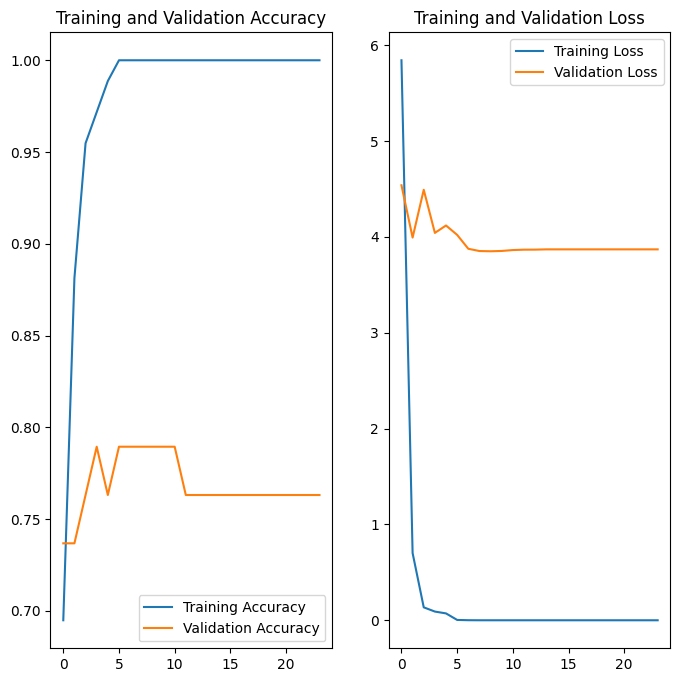

2024-04-18 14:47:33.046882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 252ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.8333333333333334
Recall: 0.9090909090909091
F1-Score: 0.8695652173913043


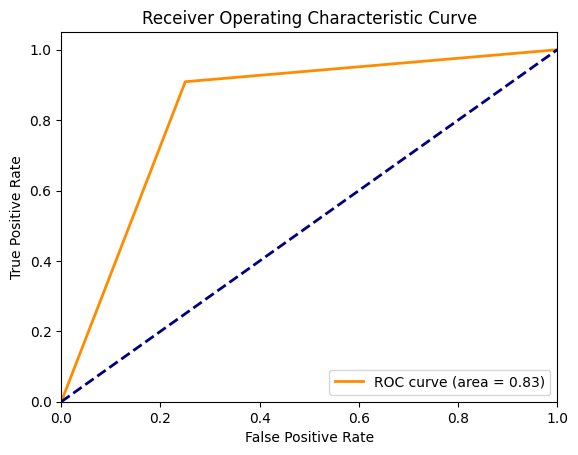

Epoch 1/30


2024-04-18 14:47:33.980265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 23.3451 - accuracy: 0.6102

2024-04-18 14:47:38.630944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 6s 125ms/step - loss: 23.3451 - accuracy: 0.6102 - val_loss: 15.0296 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 35ms/step - loss: 6.6441 - accuracy: 0.7175 - val_loss: 7.2047 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 37ms/step - loss: 3.9068 - accuracy: 0.8305 - val_loss: 7.4507 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 30ms/step - loss: 3.6901 - accuracy: 0.8192 - val_loss: 6.9653 - val_accuracy: 0.6316 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 31ms/step - loss: 3.4951 - accuracy: 0.8362 - val_loss: 6.9292 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 28ms/step - loss: 3.1280 - accuracy: 0.8249 - val_loss: 7.2618 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 34ms/step - loss: 3.0220 - ac

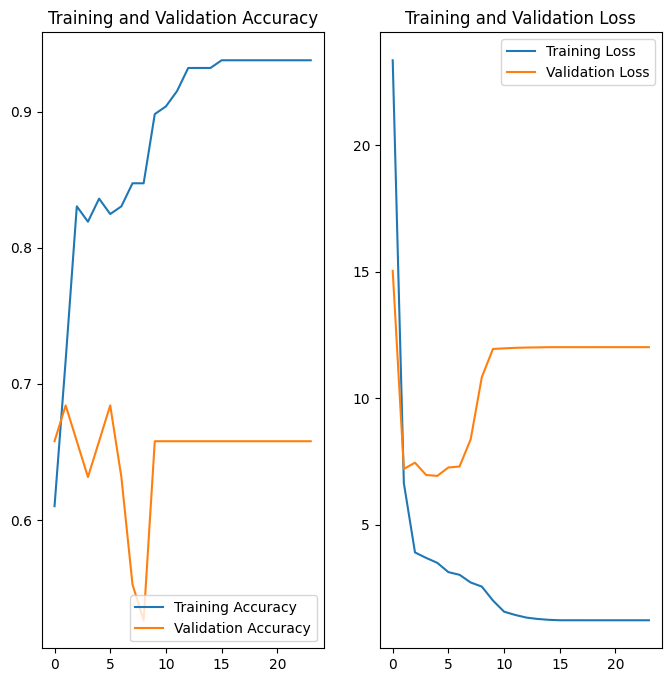

2024-04-18 14:48:03.843997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 283ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.8636363636363636
Recall: 0.8636363636363636
F1-Score: 0.8636363636363636


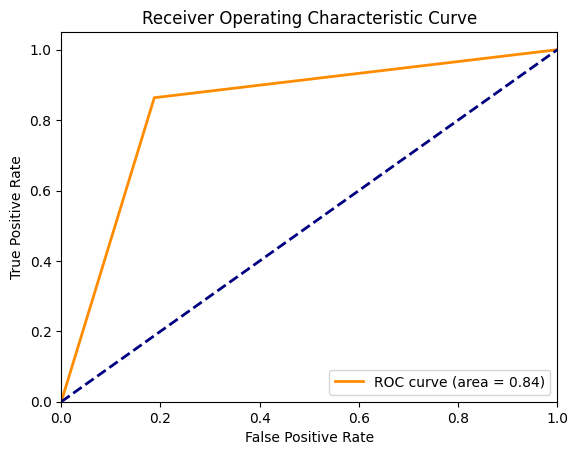

Epoch 1/30


2024-04-18 14:48:04.869539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 9.7372 - accuracy: 0.7175 

2024-04-18 14:48:09.544095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 6s 116ms/step - loss: 9.7372 - accuracy: 0.7175 - val_loss: 12.0220 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 37ms/step - loss: 4.6488 - accuracy: 0.7853 - val_loss: 4.8552 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 29ms/step - loss: 2.5926 - accuracy: 0.8023 - val_loss: 15.7085 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 33ms/step - loss: 2.7393 - accuracy: 0.8023 - val_loss: 5.3426 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 32ms/step - loss: 0.5546 - accuracy: 0.9209 - val_loss: 3.6941 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 26ms/step - loss: 0.1856 - accuracy: 0.9492 - val_loss: 3.2512 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 29ms/step - loss: 0.0176 - ac

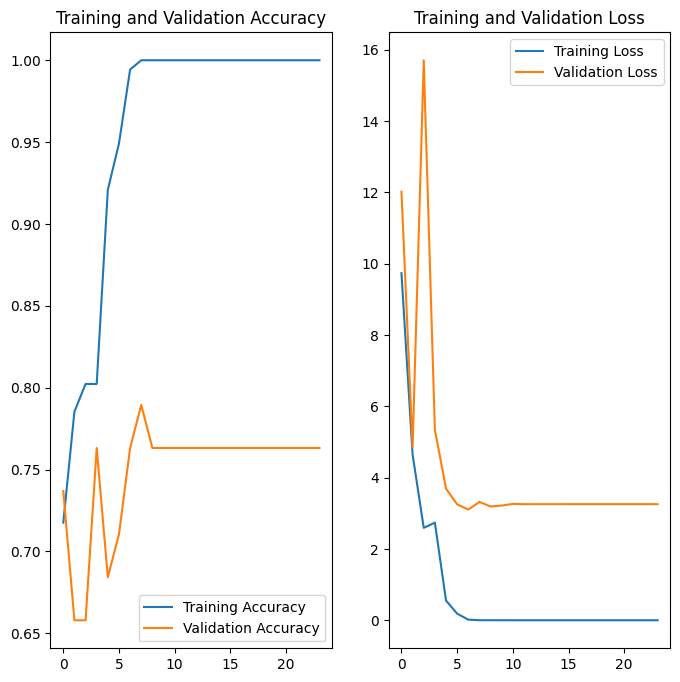

2024-04-18 14:48:34.920052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 246ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8
Recall: 0.9090909090909091
F1-Score: 0.8510638297872342


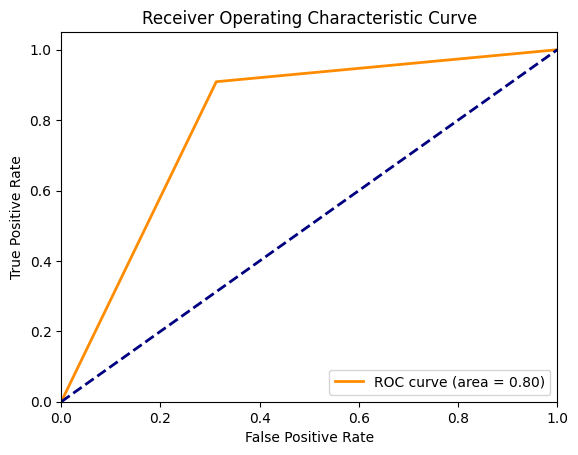

Epoch 1/30


2024-04-18 14:48:35.836034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 37.8508 - accuracy: 0.5932

2024-04-18 14:48:40.459798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 6s 121ms/step - loss: 37.8508 - accuracy: 0.5932 - val_loss: 10.5700 - val_accuracy: 0.6053 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 36ms/step - loss: 4.7064 - accuracy: 0.7684 - val_loss: 4.1637 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 39ms/step - loss: 0.9401 - accuracy: 0.8475 - val_loss: 4.8897 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 37ms/step - loss: 1.8911 - accuracy: 0.7910 - val_loss: 8.5618 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 30ms/step - loss: 2.1735 - accuracy: 0.7571 - val_loss: 5.9042 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 28ms/step - loss: 1.1752 - accuracy: 0.8079 - val_loss: 4.2734 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 28ms/step - loss: 0.2382 - ac

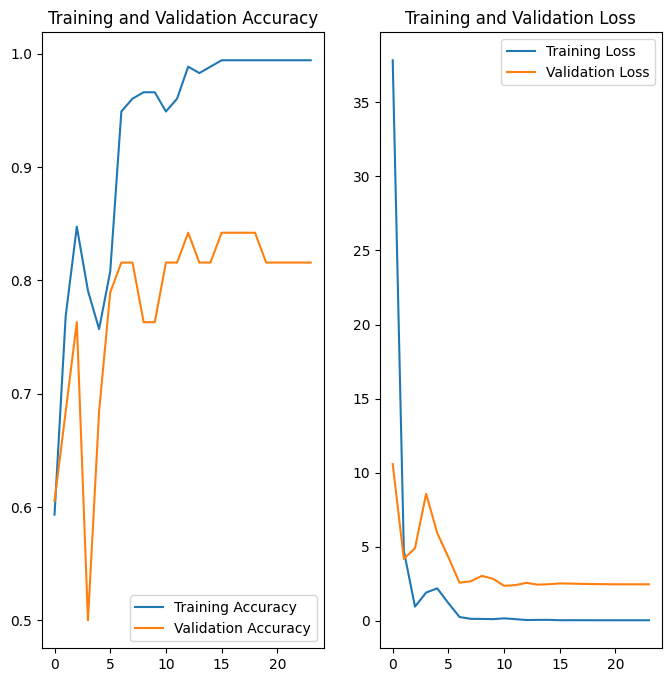

2024-04-18 14:49:06.219634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 279ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.8333333333333334
Recall: 0.9090909090909091
F1-Score: 0.8695652173913043


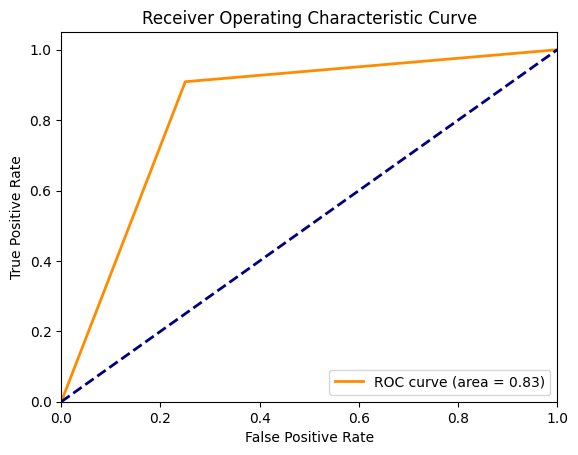

Epoch 1/30


2024-04-18 14:49:07.252901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 77.8582 - accuracy: 0.4802

2024-04-18 14:49:11.897243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 6s 119ms/step - loss: 77.8582 - accuracy: 0.4802 - val_loss: 35.2772 - val_accuracy: 0.4474 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 35ms/step - loss: 10.7539 - accuracy: 0.6554 - val_loss: 23.8988 - val_accuracy: 0.6053 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 2s 45ms/step - loss: 12.9476 - accuracy: 0.5819 - val_loss: 35.7687 - val_accuracy: 0.6053 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 32ms/step - loss: 22.1165 - accuracy: 0.7175 - val_loss: 8.4286 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 31ms/step - loss: 3.9821 - accuracy: 0.8079 - val_loss: 6.6713 - val_accuracy: 0.6053 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 27ms/step - loss: 3.3799 - accuracy: 0.7627 - val_loss: 6.5329 - val_accuracy: 0.6053 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 28ms/step - loss: 3.2296

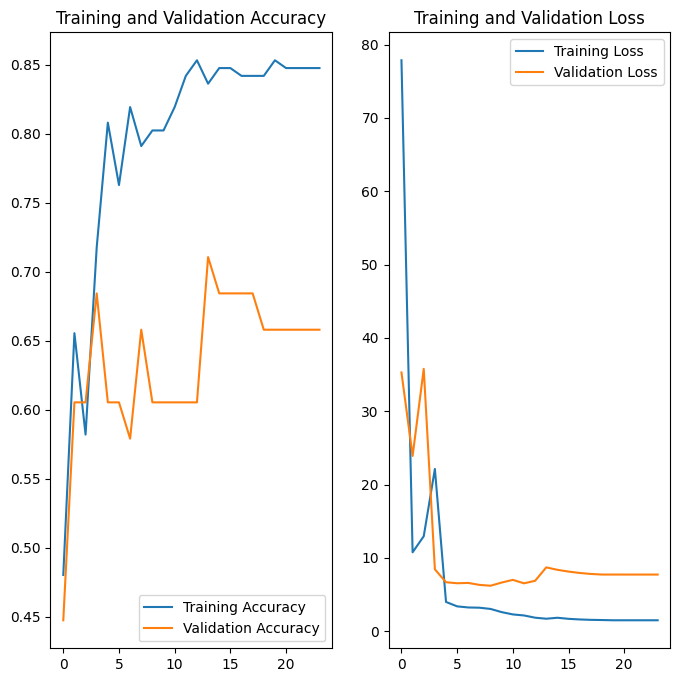

2024-04-18 14:49:36.780825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 212ms/step
Overall Accuracy: 0.6842105263157895
Precision: 0.75
Recall: 0.6818181818181818
F1-Score: 0.7142857142857143


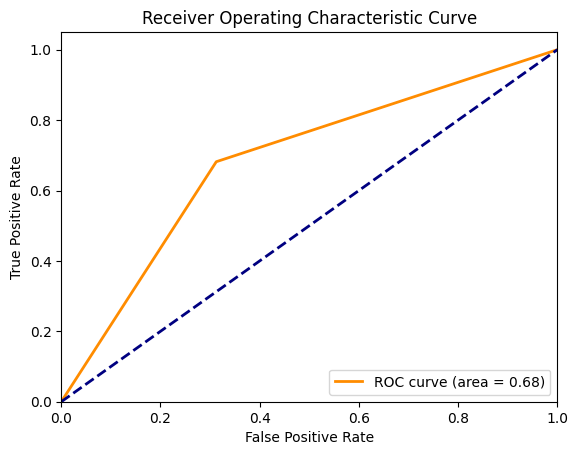

In [25]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    
    y1 = layers.Conv2D(8,(1,1) ,strides=(1,1), padding='same')(x)
    y2 = layers.Conv2D(8, (3,3), padding='same')(x)
    y = layers.Concatenate()([y1,y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y1 = layers.Conv2D(16, (1,1), padding='same')(y)
    y2 = layers.Conv2D(16, (3,3), padding='same')(y)
    y = layers.Concatenate()([y1, y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y1 = layers.SeparableConv2D(20, (1,1), padding='same')(y)
    y2 = layers.SeparableConv2D(20, (3,3), padding='same')(y)
    y = layers.Concatenate()([y1, y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
    
    y1 = layers.SeparableConv2D(20, (1,1), padding='same')(y)
    y2 = layers.SeparableConv2D(20, (3,3), padding='same')(y)
    y = layers.Concatenate()([y1, y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
 
    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y) 
    y = layers.Dense(1, activation='sigmoid')(y)

    model_sep_conv_RLR_ES = tf.keras.Model(x,y)
    model_sep_conv_RLR_ES._name = 'Model_sep_conv_RLR_ES'
    
    if i == 0:
        model_sep_conv_RLR_ES.summary()

    # COMPILING
    model_sep_conv_RLR_ES.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # SCHEDULER
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        min_delta=0.001,
        patience=3,
        verbose=1,
        mode='auto',
        baseline=None,
        restore_best_weights=False,
        start_from_epoch=20
    )
    
    reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.01,
        patience=5,
        verbose=0,
        mode='auto',
        min_delta=0.001,
        cooldown=0,
        min_lr=0.0, 
    )
    
    # TRAINING
    epochs = 30
    history = model_sep_conv_RLR_ES.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val),
                          callbacks=[early_stopping, reduce_lr_on_plateau])

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_sep_conv_RLR_ES.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_sep_conv_RLR_ES
    del history


Model: "model_sep_conv_RLR_ES_L2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_36 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 conv2d_140 (Conv2D)         (None, 400, 400, 8)          16        ['input_36[0][0]']            
                                                                                                  
 conv2d_141 (Conv2D)         (None, 400, 400, 8)          80        ['input_36[0][0]']            
                                                                                                  
 concatenate_140 (Concatena  (None, 400, 400, 16)         0         ['conv2d_140[0][0]',          
 te)                                                                 'conv2

2024-04-18 14:57:35.032353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 13.4282 - accuracy: 0.5706

2024-04-18 14:57:41.196385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 8s 163ms/step - loss: 13.4282 - accuracy: 0.5706 - val_loss: 5.2599 - val_accuracy: 0.6316 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 3s 72ms/step - loss: 1.7194 - accuracy: 0.7910 - val_loss: 2.5355 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 2s 66ms/step - loss: 0.5748 - accuracy: 0.8814 - val_loss: 1.2652 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 3s 71ms/step - loss: 0.1658 - accuracy: 0.9492 - val_loss: 1.7940 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 2s 67ms/step - loss: 0.0410 - accuracy: 0.9887 - val_loss: 1.5028 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 2s 67ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 1.3495 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 2s 64ms/step - loss: 0.0090 - acc

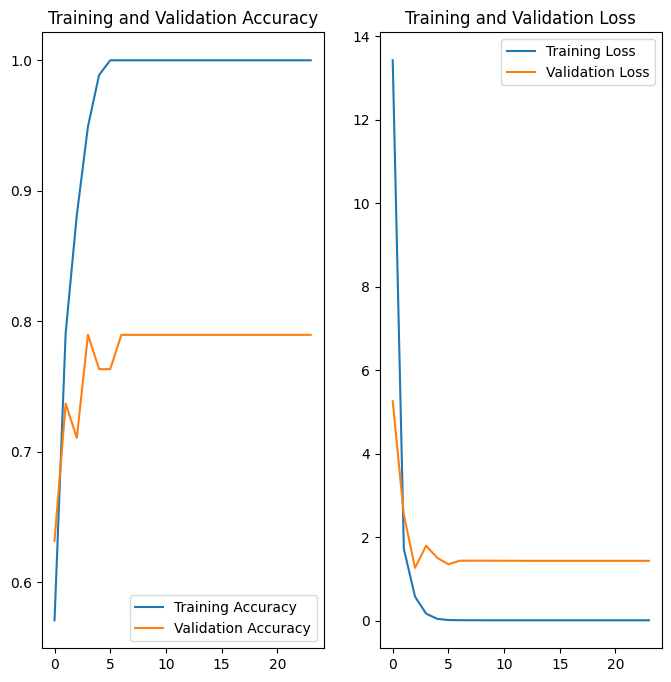

2024-04-18 14:58:37.193555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 236ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.7857142857142857
Recall: 1.0
F1-Score: 0.88


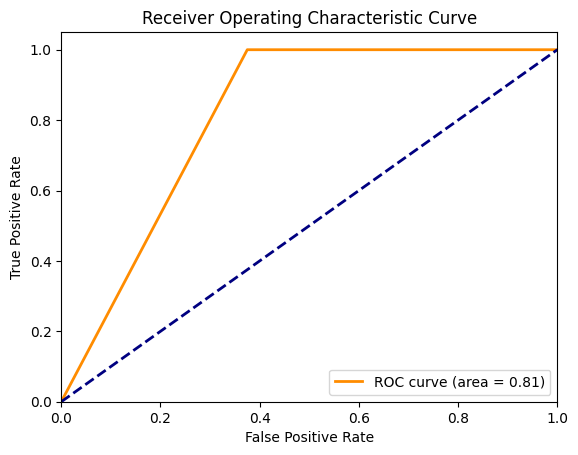

Epoch 1/30


2024-04-18 14:58:38.170480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 29.1827 - accuracy: 0.5932

2024-04-18 14:58:44.033203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 8s 159ms/step - loss: 29.1827 - accuracy: 0.5932 - val_loss: 17.9038 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 3s 72ms/step - loss: 5.2946 - accuracy: 0.7853 - val_loss: 7.4244 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 2s 69ms/step - loss: 2.2988 - accuracy: 0.8588 - val_loss: 10.8638 - val_accuracy: 0.6053 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 3s 71ms/step - loss: 9.9620 - accuracy: 0.7627 - val_loss: 10.1795 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 3s 83ms/step - loss: 3.4299 - accuracy: 0.8362 - val_loss: 11.3154 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 2s 67ms/step - loss: 1.6180 - accuracy: 0.8927 - val_loss: 8.5713 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 3s 71ms/step - loss: 1.6025 -

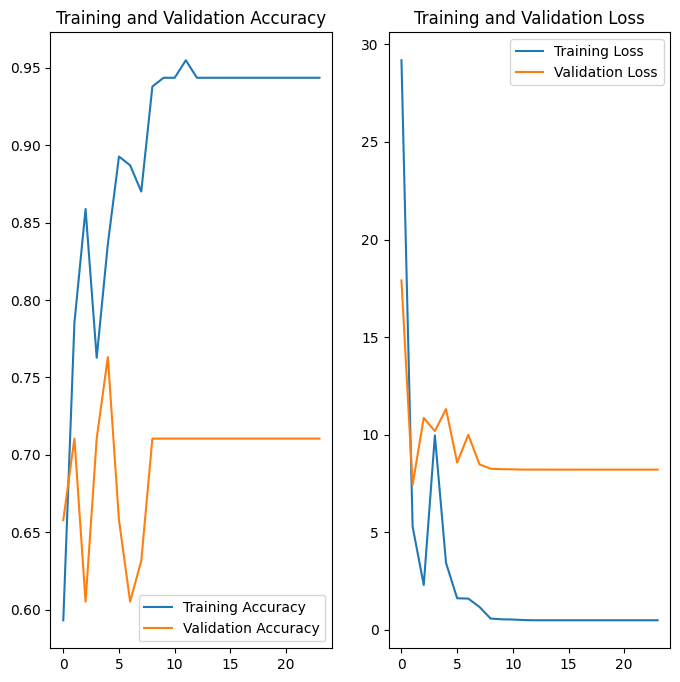

2024-04-18 14:59:42.289503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 252ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8947368421052632
Recall: 0.7727272727272727
F1-Score: 0.8292682926829269


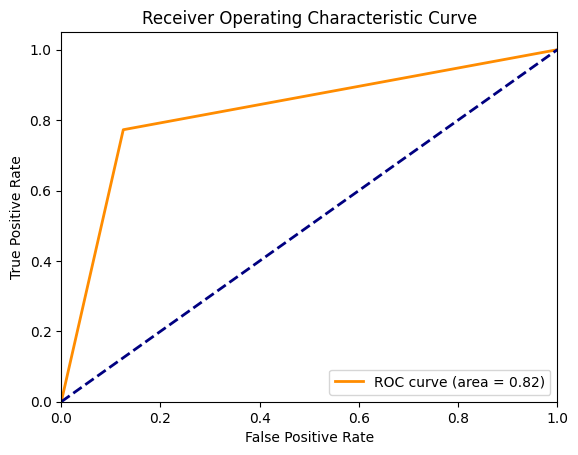

Epoch 1/30


2024-04-18 14:59:43.243953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 27.0890 - accuracy: 0.6102

2024-04-18 14:59:49.183457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 8s 162ms/step - loss: 27.0890 - accuracy: 0.6102 - val_loss: 14.3493 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 3s 81ms/step - loss: 4.9194 - accuracy: 0.7966 - val_loss: 9.6524 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 3s 74ms/step - loss: 3.0143 - accuracy: 0.7910 - val_loss: 9.1010 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 3s 72ms/step - loss: 2.1323 - accuracy: 0.8192 - val_loss: 4.4775 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 3s 71ms/step - loss: 1.2812 - accuracy: 0.8701 - val_loss: 4.0871 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 3s 73ms/step - loss: 1.8770 - accuracy: 0.8644 - val_loss: 3.4014 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 3s 77ms/step - loss: 0.2637 - ac

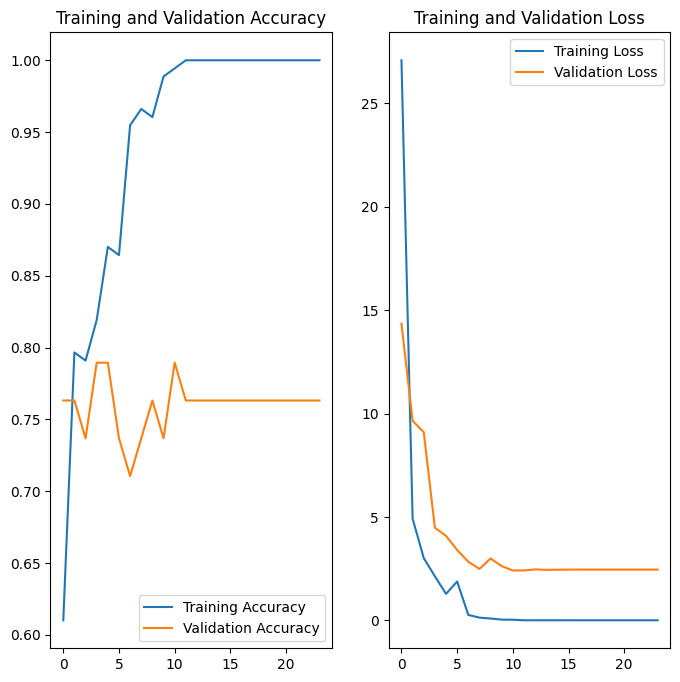

2024-04-18 15:00:50.251577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 247ms/step
Overall Accuracy: 0.9210526315789473
Precision: 0.88
Recall: 1.0
F1-Score: 0.9361702127659575


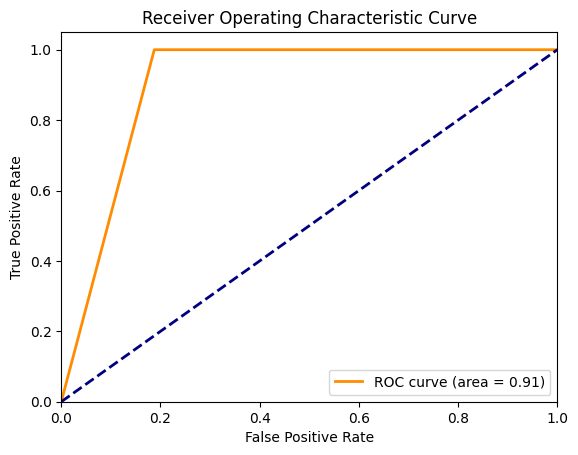

In [26]:
for i in range(3):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    
    y1 = layers.Conv2D(8,(1,1) ,strides=(1,1), padding='same', kernel_regularizer=regularizers.L2(0.0001))(x)
    y2 = layers.Conv2D(8, (3,3), padding='same', kernel_regularizer=regularizers.L2(0.0001))(x)
    y = layers.Concatenate()([y1,y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y1 = layers.Conv2D(16, (1,1), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y2 = layers.Conv2D(16, (3,3), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y = layers.Concatenate()([y1, y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y1 = layers.SeparableConv2D(20, (1,1), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y2 = layers.SeparableConv2D(20, (3,3), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y = layers.Concatenate()([y1, y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
    
    y1 = layers.SeparableConv2D(20, (1,1), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y2 = layers.SeparableConv2D(20, (3,3), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y = layers.Concatenate()([y1, y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
 
    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y) 
    y = layers.Dense(1, activation='sigmoid')(y)

    model_sep_conv_RLR_ES_L2 = tf.keras.Model(x,y)
    model_sep_conv_RLR_ES_L2._name = 'model_sep_conv_RLR_ES_L2'
    
    if i == 0:
        model_sep_conv_RLR_ES_L2.summary()

    # COMPILING
    model_sep_conv_RLR_ES_L2.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # SCHEDULER
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        min_delta=0.001,
        patience=3,
        verbose=1,
        mode='auto',
        baseline=None,
        restore_best_weights=False,
        start_from_epoch=20
    )
    
    reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.01,
        patience=5,
        verbose=0,
        mode='auto',
        min_delta=0.001,
        cooldown=0,
        min_lr=0.0, 
    )
    
    # TRAINING
    epochs = 30
    history = model_sep_conv_RLR_ES_L2.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val),
                          callbacks=[early_stopping, reduce_lr_on_plateau])

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_sep_conv_RLR_ES_L2.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_sep_conv_RLR_ES_L2
    del history


Model: "model_sep_conv_RLR_ES_L2_DO"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_43 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 conv2d_168 (Conv2D)         (None, 400, 400, 8)          16        ['input_43[0][0]']            
                                                                                                  
 conv2d_169 (Conv2D)         (None, 400, 400, 8)          80        ['input_43[0][0]']            
                                                                                                  
 dropout_12 (Dropout)        (None, 400, 400, 8)          0         ['conv2d_168[0][0]']          
                                                                        

2024-04-18 15:13:03.675160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 32.8067 - accuracy: 0.5593

2024-04-18 15:13:10.097522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 9s 182ms/step - loss: 32.8067 - accuracy: 0.5593 - val_loss: 12.7185 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 3s 88ms/step - loss: 5.4663 - accuracy: 0.7966 - val_loss: 6.1962 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 3s 88ms/step - loss: 4.9472 - accuracy: 0.7514 - val_loss: 9.1554 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 3s 88ms/step - loss: 2.5096 - accuracy: 0.8249 - val_loss: 5.8711 - val_accuracy: 0.6053 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 3s 77ms/step - loss: 7.1668 - accuracy: 0.7119 - val_loss: 14.7696 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 3s 82ms/step - loss: 7.5904 - accuracy: 0.7119 - val_loss: 7.2407 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 3s 80ms/step - loss: 2.1318 - a

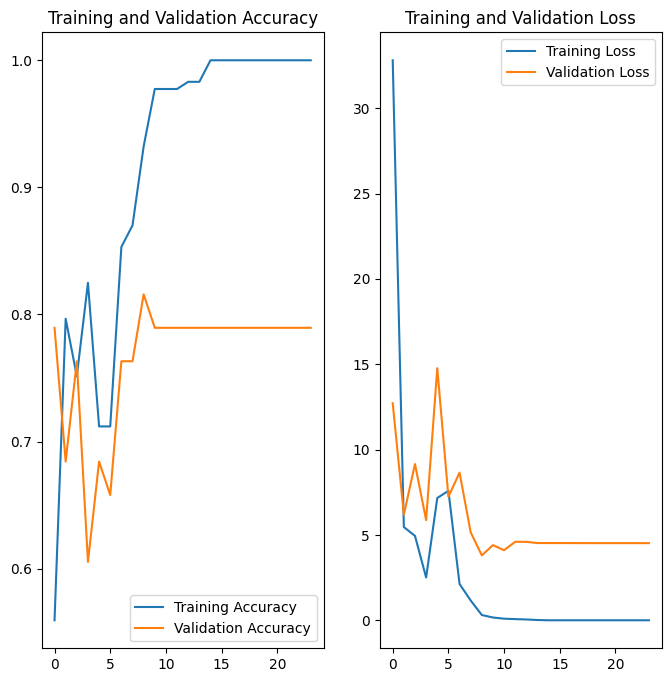

2024-04-18 15:14:16.649964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 262ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.8076923076923077
Recall: 0.9545454545454546
F1-Score: 0.875


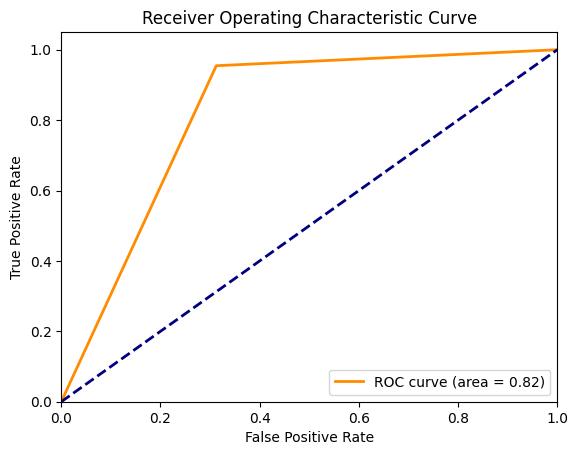

Epoch 1/30


2024-04-18 15:14:17.683764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 13.0663 - accuracy: 0.6328

2024-04-18 15:14:24.625627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 9s 179ms/step - loss: 13.0663 - accuracy: 0.6328 - val_loss: 25.4010 - val_accuracy: 0.6053 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 3s 93ms/step - loss: 21.1147 - accuracy: 0.6215 - val_loss: 13.1074 - val_accuracy: 0.6316 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 3s 81ms/step - loss: 3.7487 - accuracy: 0.6723 - val_loss: 3.2271 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 3s 77ms/step - loss: 1.0429 - accuracy: 0.8249 - val_loss: 2.8629 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 3s 78ms/step - loss: 0.9017 - accuracy: 0.7910 - val_loss: 2.9199 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 3s 83ms/step - loss: 0.9536 - accuracy: 0.7853 - val_loss: 3.0111 - val_accuracy: 0.6316 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 3s 87ms/step - loss: 1.1121 - 

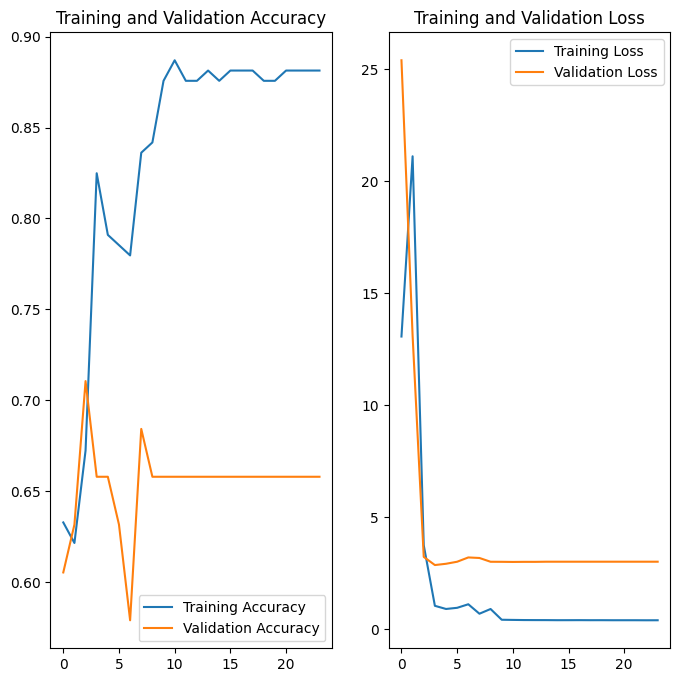

2024-04-18 15:15:32.408764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 497ms/step
Overall Accuracy: 0.7894736842105263
Precision: 0.7692307692307693
Recall: 0.9090909090909091
F1-Score: 0.8333333333333333


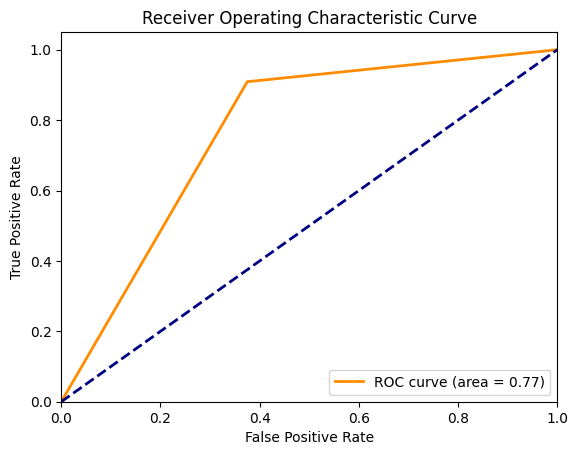

Epoch 1/30


2024-04-18 15:15:33.712232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 21.8153 - accuracy: 0.6328

2024-04-18 15:15:40.844105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 9s 199ms/step - loss: 21.8153 - accuracy: 0.6328 - val_loss: 9.5391 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 3s 92ms/step - loss: 5.6145 - accuracy: 0.7740 - val_loss: 26.8119 - val_accuracy: 0.3947 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 3s 95ms/step - loss: 12.4600 - accuracy: 0.6949 - val_loss: 9.7909 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 3s 78ms/step - loss: 1.7802 - accuracy: 0.8531 - val_loss: 3.8659 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 3s 87ms/step - loss: 0.6692 - accuracy: 0.8757 - val_loss: 3.5831 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 3s 72ms/step - loss: 0.3102 - accuracy: 0.9209 - val_loss: 3.0624 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 3s 77ms/step - loss: 0.0892 - a

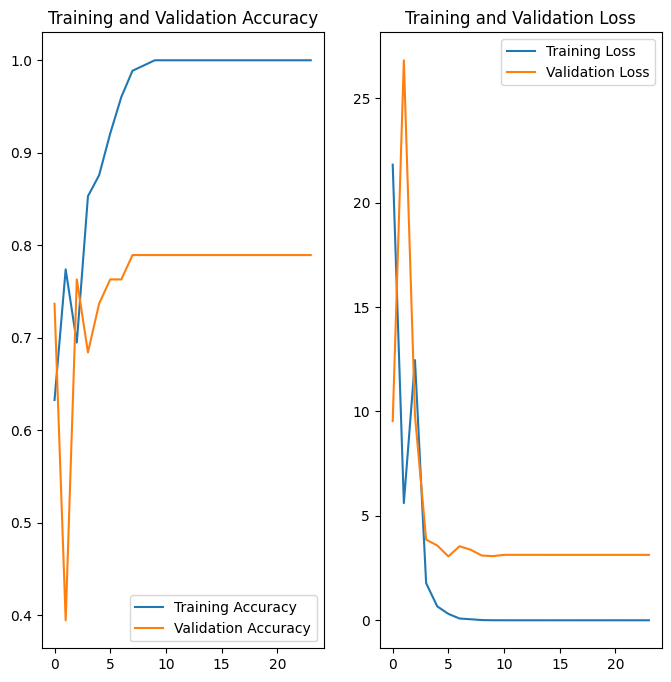

2024-04-18 15:16:48.105509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 241ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.8076923076923077
Recall: 0.9545454545454546
F1-Score: 0.875


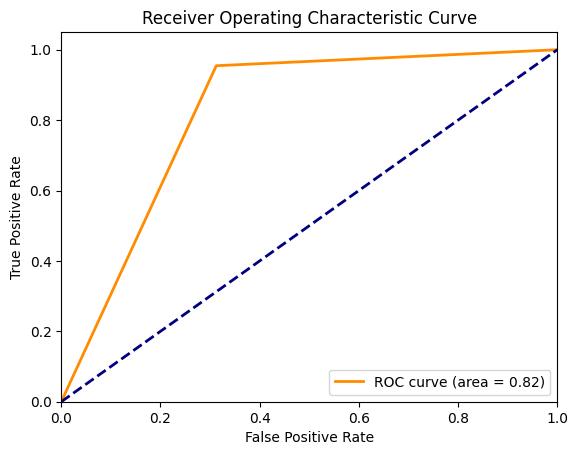

In [30]:
for i in range(3):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    
    y1 = layers.Conv2D(8,(1,1) ,strides=(1,1), padding='same', kernel_regularizer=regularizers.L2(0.0001))(x)
    y1 = layers.Dropout(0.0001)(y1)
    y2 = layers.Conv2D(8, (3,3), padding='same', kernel_regularizer=regularizers.L2(0.0001))(x)
    y2 = layers.Dropout(0.0001)(y2)
    y = layers.Concatenate()([y1,y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y1 = layers.Conv2D(16, (1,1), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y2 = layers.Conv2D(16, (3,3), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y = layers.Concatenate()([y1, y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
    #y = layers.Dropout(0.001)(y)

    y1 = layers.SeparableConv2D(20, (1,1), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y2 = layers.SeparableConv2D(20, (3,3), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y = layers.Concatenate()([y1, y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
    #y = layers.Dropout(0.001)(y)
    
    y1 = layers.SeparableConv2D(20, (1,1), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y2 = layers.SeparableConv2D(20, (3,3), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y = layers.Concatenate()([y1, y2])
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
 
    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y) 
    y = layers.Dense(1, activation='sigmoid')(y)
    

    model_sep_conv_RLR_ES_L2_DO = tf.keras.Model(x,y)
    model_sep_conv_RLR_ES_L2_DO._name = 'model_sep_conv_RLR_ES_L2_DO'
    
    if i == 0:
        model_sep_conv_RLR_ES_L2_DO.summary()

    # COMPILING
    model_sep_conv_RLR_ES_L2_DO.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # SCHEDULER
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        min_delta=0.001,
        patience=3,
        verbose=1,
        mode='auto',
        baseline=None,
        restore_best_weights=False,
        start_from_epoch=20
    )
    
    reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.01,
        patience=5,
        verbose=0,
        mode='auto',
        min_delta=0.001,
        cooldown=0,
        min_lr=0.0, 
    )
    
    # TRAINING
    epochs = 30
    history = model_sep_conv_RLR_ES_L2_DO.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val),
                          callbacks=[early_stopping, reduce_lr_on_plateau])

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_sep_conv_RLR_ES_L2_DO.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_sep_conv_RLR_ES_L2_DO
    del history
